In [ ]:
import requests
import re
from bs4 import BeautifulSoup, Comment
import pandas as pd
import numpy as np
import string
import multiprocess as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_bat = pd.read_csv('asset/batters.csv',index_col=0)
df_bat

Year  Age   Tm  Lg  G_bat     PA     AB      R      H    2B    3B  \
0      1954.0   20  MLN  NL  122.0  509.0  468.0   58.0  131.0  27.0   6.0   
1      1955.0   21  MLN  NL  153.0  665.0  602.0  105.0  189.0  37.0   9.0   
2      1956.0   22  MLN  NL  153.0  660.0  609.0  106.0  200.0  34.0  14.0   
3      1957.0   23  MLN  NL  151.0  675.0  615.0  118.0  198.0  27.0   6.0   
4      1958.0   24  MLN  NL  153.0  664.0  601.0  109.0  196.0  34.0   4.0   
...       ...  ...  ...  ..    ...    ...    ...    ...    ...   ...   ...   
43273  1987.0   28  NYY  AL   14.0   36.0   34.0    2.0    6.0   0.0   0.0   
43274  1988.0   29  CLE  AL   51.0  146.0  130.0    9.0   30.0   5.0   1.0   
43275  1989.0   30  CLE  AL   24.0   60.0   58.0   10.0   16.0   2.0   0.0   
43276  1910.0   21  CHW  AL   27.0  100.0   87.0    7.0   16.0   5.0   0.0   
43277  1916.0   27  CHC  NL   35.0   59.0   53.0    4.0    6.0   1.0   0.0   

         HR    RBI   SB   CS    BB    SO     BA    OBP    SLG    OPS   OPS+  \
0      13.0   69.0  2.0  2.0  28.0  39.0  0.280  0.322  0.447  0.769  104.0   
1      27.0  106.0  3.0  1.0  49.0  61.0  0.314  0.366  0.540  0.906  141.0   
2      26.0   92.0  2.0  4.0  37.0  54.0  0.328  0.365  0.558  0.923  151.0   
3      44.0  132.0  1.0  1.0  57.0  58.0  0.322  0.378  0.600  0.978  166.0   
4      30.0   95.0  4.0  1.0  59.0  49.0  0.326  0.386  0.546  0.931  153.0   
...     ...    ...  ...  ...   ...   ...    ...    ...    ...    ...    ...   
43273   0.0    0.0  0.0  0.0   0.0   4.0  0.176  0.176  0.176  0.353   -5.0   
43274   0.0    7.0  0.0  0.0   8.0  13.0  0.231  0.275  0.285  0.560   56.0   
43275   2.0    6.0  0.0  0.0   1.0  11.0  0.276  0.300  0.414  0.714   99.0   
43276   0.0    5.0  1.0  NaN  11.0  16.0  0.184  0.283  0.241  0.524   69.0   
43277   1.0    8.0  0.0  NaN   4.0   6.0  0.113  0.175  0.189  0.364    7.0   

          TB   GDP  HBP   SH   SF   IBB Pos_bat       Awards  marker    G  \
0      209.0  13.0  3.0  6.0  4.0   0.0   *79/H        RoY-4       1  122   
1      325.0  20.0  3.0  7.0  4.0   5.0  *974/H     AS,MVP-9       1  153   
2      340.0  21.0  2.0  5.0  7.0   6.0    *9/H     AS,MVP-3       1  153   
3      369.0  13.0  0.0  0.0  3.0  15.0   *98/H     AS,MVP-1       1  151   
4      328.0  21.0  1.0  0.0  3.0  16.0     *98  AS,MVP-3,GG       1  153   
...      ...   ...  ...  ...  ...   ...     ...          ...     ...  ...   
43273    6.0   1.0  0.0  2.0  0.0   0.0   /46H5          NaN       1   14   
43274   37.0   3.0  0.0  8.0  0.0   0.0     6/H          NaN       1   51   
43275   24.0   0.0  1.0  0.0  0.0   0.0   6/5HD          NaN       1   24   
43276   21.0   NaN  1.0  1.0  NaN   NaN     8/9          NaN       1   27   
43277   10.0   NaN  0.0  2.0  NaN   NaN    H/89          NaN       1   35   

       Rbat  Rbaser  Rdp  Rfield  Rpos  RAA  WAA  Rrep  RAR  WAR  waaWL%  \
0         5      -2   -1      -1    -5   -4 -0.5    19   16  1.4   0.497   
1        37       2   -1       7    -5   40  3.8    25   65  6.2   0.527   
2        41       0   -1      15    -7   47  4.6    24   72  7.2   0.533   
3        53       2    0       4    -4   55  5.5    25   80  8.0   0.538   
4        44       4   -2       8    -6   48  4.8    25   72  7.3   0.532   
...     ...     ...  ...     ...   ...  ...  ...   ...  ...  ...     ...   
43273    -6       0    0      -1     1   -6 -0.6     1   -5 -0.5   0.457   
43274    -7      -1    0      -6     3  -11 -1.1     5   -6 -0.7   0.477   
43275    -1       0    1      -1     1   -1  0.0     2    2  0.2   0.498   
43276    -3       0    0       0    -1   -3 -0.5     4    0  0.0   0.484   
43277    -5       0    0      -1     0   -7 -0.9     2   -5 -0.7   0.476   

       162WL%  oWAR  dWAR  oRAR    Salary   rOBA  Rbat+  BAbip    ISO  HR%  \
0       0.498   1.6  -0.7    17    6000.0  0.356  109.0  0.281  0.167  2.6   
1       0.525   5.8   0.0    58   10000.0  0.406  149.0  0.313  0.226  4.1   
2       0.531   6.0   0.7    57   17500.0  0.402  1

In [ ]:
def career_stats(df, force={}, skill='batter'):
    cols = list(df.select_dtypes('object').columns)
    cols.remove('Player')
    keep = [x for x in df.columns if x not in cols]
    df = df[keep]
    colMax = ['Age','Season','oWAR_3','oWAR_7','oWAR_10','oWAR_15', 'HOF', 'last_game', 'Year']
    colMean = ['BA','OBP','SLG','OPS','OPS+','BAbip','Pos_2','rOBA', 'Rbat+']
    mod = {}    
    for col in df.columns:
        if col == 'Player':
            pass
        elif '%' in col:
            mod[col]='mean'
        elif col in colMean:
            mod[col]='mean'
        elif col in colMax:
            mod[col]= 'max'
        else:
            mod[col]= 'sum'
    if force:
        for key, value in force.items():
            mod[key]= value
            
    df2 = df.groupby('Player').agg(mod).reset_index()
    if skill == 'batter':
        df2['Pos_mean'] = df2['Pos_adjust']/df2['G']
        
    df2['SLG'] = (df2['HR']*4 + df2['3B']*3 + df2['2B']*2 + (df2['H']-df2['HR']-df2['3B']-df2['2B']))/df2['AB']
    df2['BA'] = df2['H']/df2['AB']
    df2['OBP'] = (df2['H']+df2['BB'])/(df2['PA']-df2['SF'])
    df2['OPS'] = df2['OBP']+df2['SLG']
    
    return df2


def simScore(df, name = 'Henry Aaron', n=10):
    df['Bill Score'] = 0
    stats_p1 = df.loc[name]
    p2 = df.loc[df.index != name,:]
    df.loc[name,'Bill Score'] = 1000
    for i in range(len(p2)):
        stats_p2 = p2.iloc[i]
        player = stats_p2.name
        G = (stats_p1.G-stats_p2.G)/20
        AB = (stats_p1.AB-stats_p2.AB)/75
        R = (stats_p1.R-stats_p2.R)/10
        H = (stats_p1.H-stats_p2.H)/15
        Doubles = (stats_p1['2B']-stats_p2['2B'])/5
        Triples = (stats_p1['3B']-stats_p2['3B'])/4
        HR = (stats_p1.HR-stats_p2.HR)/2
        RBI = (stats_p1.RBI-stats_p2.RBI)/10
        BB = (stats_p1.BB-stats_p2.BB)/25
        SO = (stats_p1.SO-stats_p2.SO)/150
        SB = (stats_p1.SB-stats_p2.SB)/20
        BA = (stats_p1.BA-stats_p2.BA)/0.001
        SLG = (stats_p1.SLG-stats_p2.SLG)/0.002
        try:
            POS = (stats_p1.Pos_mean-stats_p2.Pos_mean)*12
        except:
            POS = 0
        simScore = 1000 - abs(POS) - abs(G)- abs(AB)- abs(R)- abs(H)- abs(Doubles)- abs(Triples)- abs(HR)- abs(RBI)- abs(BB)-abs(SO)- abs(SB)- abs(BA)- abs(SLG)
        df.loc[player,'Bill Score'] = simScore    
    df = df.sort_values('Bill Score', ascending=False)[:n]
    return df

In [ ]:
## we have individual season by season data of players... now we need to collected full career summary data

df = career_stats(df_bat)
df = df[['Player'] + ['Season','G', 'AB', 'R', 'H','2B','3B', 'HR','RBI', 'SB','BA', 'SLG','OPS', 'TB','Rbat','WAA','RAR','oRAR','RE24','Pos_mean','HOF','WAR','oWAR', 'Rbat+','Rfield','Rbaser','last_game']] #'BB', 'SO', 'SB'
df = df.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
df = df[df['last_game']<=2015]

df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

## grabbing the HOF information for each player
link = 'https://www.baseball-reference.com/awards/hof.shtml'
HOF = pd.read_html(link)[0]
HOF = HOF[HOF['Inducted As']=='Player']
HOF.reset_index(drop=True, inplace=True)


df = df.merge(HOF[['Name', 'Voted By','Inducted As']], left_on='Player_name', right_on='Name', how='left')
df.loc[(df['Voted By'].isna())&(df['HOF']==1),'Voted By']='BBWAA'
df

Player  Season     G       AB       R       H     2B    3B     HR  \
0     aaronha01      23  3298  12364.0  2174.0  3771.0  624.0  98.0  755.0   
1     aaronto01       7   437    944.0   102.0   216.0   42.0   6.0   13.0   
2     abbated01       9   855   3044.0   355.0   772.0   99.0  43.0   11.0   
3     abbeych01       1    79    301.0    47.0    79.0   12.0   6.0    1.0   
4     abbotfr01       3   160    513.0    48.0   107.0   21.0   6.0    1.0   
...         ...     ...   ...      ...     ...     ...    ...   ...    ...   
4295   ziskri01      13  1453   5144.0   681.0  1477.0  245.0  26.0  207.0   
4296  zitzmbi01       6   406   1004.0   197.0   268.0   38.0  11.0    3.0   
4297  zupcibo01       4   319    795.0    99.0   199.0   47.0   4.0    7.0   
4298  zuvelpa01       7   205    490.0    41.0   109.0   17.0   2.0    2.0   
4299  zwilldu01       2    62    140.0    11.0    22.0    6.0   0.0    1.0   

         RBI     SB        BA       SLG       OPS      TB  Rbat   WAA   RAR  \
0     2297.0  240.0  0.304998  0.554513  0.928826  6856.0   877  92.7  1365   
1       94.0    9.0  0.228814  0.327331  0.617715   309.0   -29  -6.6   -21   
2      324.0  142.0  0.253614  0.325230  0.630203   990.0     1  -3.0    81   
3       49.0   16.0  0.262458  0.352159  0.662101   106.0   -10  -1.9   -11   
4       49.0   14.0  0.208577  0.278752  0.500194   143.0   -23  -1.7     7   
...      ...    ...       ...       ...       ...     ...   ...   ...   ...   
4295   792.0    8.0  0.287131  0.465591  0.818470  2395.0   171   6.5   253   
4296    89.0   42.0  0.266932  0.335657  0.643013   337.0   -32  -5.2   -16   
4297    80.0    7.0  0.250314  0.345912  0.637484   275.0   -30  -4.0    -5   
4298    20.0    2.0  0.222449  0.277551  0.540419   136.0   -32  -4.1   -20   
4299    13.0    1.0  0.157143  0.221429  0.454133    31.0    -8  -1.4    -5   

      oRAR   RE24   Pos_mean  HOF    WAR   oWAR       Rbat+  Rfield  Rbaser  \
0     1266  996.9   3.306246    1  143.1  132.7  158.043478      98      44   
1      -13  -30.7   1.034325    0   -2.8   -2.1   53.571429      -7       0   
2      137    0.0  11.513450    0    8.6   15.1   92.666667     -57      -1   
3       -3    0.0   3.949367    0   -0.8   -0.1   81.000000      -8       0   
4        5    0.0  17.250000    0    0.5    0.3   52.000000       2       0   
...    ...    ...        ...  ...    ...    ...         ...     ...     ...   
4295   258  158.7   2.293187    0   25.1   25.8  124.923077      -8     -14   
4296    -7  -20.9   2.847291    0   -1.5   -0.5   60.166667      -9       1   
4297    -3  -27.2   3.536050    0   -0.7   -0.5   47.750000      -2       1   
4298    -5  -41.6   8.892683    0   -2.3   -0.6   28.142857     -17      -1   
4299    -4   -3.7   2.903226    0   -0.7   -0.5   34.500000      -1       0   

      last_game     Player_name         Name Voted By Inducted As  
0          1976     Henry Aaron  Henry Aaron    BBWAA      Player  
1          1971    Tommie Aaron          NaN      NaN         NaN  
2          1910  Ed Abbaticchio          NaN      NaN         NaN  
3          1897   Charlie Abbey          NaN      NaN         NaN  
4          1905     Fred Abbott          NaN      NaN         NaN  
...         ...             ...          ...      ...         ...  
4295       1983     Richie Zisk          NaN      NaN         NaN  
4296       1929  Billy Zitzmann          NaN      NaN         NaN  
4297       1994      Bob Zupcic          NaN      NaN         NaN  
4298       1991    Paul Zuvella          NaN      NaN         NaN  
4299       1916  Dutch Zwilling          NaN      NaN         NaN  

[4300 rows x 32 columns]

In [ ]:
df_hof = df[df['HOF']==1]
df_hof.reset_index(drop=True,inplace=True)
df_hof['Voted By'].value_counts()

BBWAA               85
Veterans            57
Old Timers          16
Special Election     2
Run Off              2
Negro League         1
Name: Voted By, dtype: int64

In [ ]:
df['Voted By'] = df['Voted By'].fillna('Not_hof')
df['Inducted As'] = df['Inducted As'].fillna('Not_hof')
keep = ['BBWAA','Not_hof']
keep2 = ['Player', 'Not_hof']
df = df[(df['Voted By'].isin(keep))&(df['Inducted As'].isin(keep2))]
df.reset_index(drop=True,inplace=True)
df.loc[df['Player']=='gwynnto01', 'Player_name'] = 'Tony Gwynn (M)'
df['HOF'].value_counts()

0    4136
1      85
Name: HOF, dtype: int64

## Feature Engineering

https://www.mlb.com/glossary


In [ ]:
def awards(player, award, n = None, df=df_bat):
    temp = df[df['Player']==player]
    try:        
        if award == 'AS' or award == 'GG':
            temp1 = temp[temp['Year']<=1933]
            if len(temp1)==0:
                add=0
            else:
                add = temp1['Awards'].str.contains('MVP',n).value_counts()[True]
            return temp['Awards'].str.contains(award).value_counts()[True] + add

        elif award == 'GG':
            return temp['Awards'].str.contains(award).value_counts()[True]
        elif award == 'MVP':
            if n:
                return temp['Awards'].str.contains('MVP-[1-{n}].',n).value_counts()[True]
            else:
                return temp['Awards'].str.contains('MVP',n).value_counts()[True]
    except:
        return 0

def rolling_max(player, n, col,df=df_bat):    
    temp = df[df['Player']==player]
    temp.reset_index(drop=True, inplace=True)    
    if sum(temp[col].rolling(n).sum().isna())== len(temp):
        if col == 'BA':            
            return sum(temp['H'])/sum(temp['AB'])
        elif col == 'SLG':            
            return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
        else:
            return sum(temp[col])
    idx = temp[col].rolling(n).sum().idxmax()
    #print(player,idx)
    
    if col == 'BA':
        temp = temp.iloc[idx-n+1:idx+1]
        return sum(temp['H'])/sum(temp['AB'])
    elif col == 'SLG':
        temp = temp.iloc[idx-n+1:idx+1]
        return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
    else:
        return max(temp[col].rolling(n).sum().dropna())

def col_max(player, col, df=df_bat):
    temp = df[df['Player']==player]
    return max(temp[col])

def year_max(player, col, percent=.9, df=df_bat):
    if col == 'BA':
        df1 = df[df['G']>100]
    else:
        df1 = df.copy()    
    yearmax = df1[[col, 'Year']].groupby('Year').agg('max').reset_index()
    yearmax.rename(columns={col:col+'_max'}, inplace=True)
    temp = df1[df1['Player']==player]
    if col == 'BA':
        temp = temp[temp['G']>40]
    temp = temp.merge(yearmax, on='Year', how='left')
    temp[col+'_new'] = np.where(temp[col]>=percent*temp[col+'_max'],1,0)
    return sum(temp[col+'_new'])


def bestof(player, n, col, df=df_bat):
    temp = df[df['Player']==player]
    temp.reset_index(drop=True, inplace=True)
    if len(temp)<=n:
        if col == 'BA':            
            return sum(temp['H'])/sum(temp['AB'])
        elif col == 'SLG':            
            return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
        else:
            return sum(temp[col])
    else:
        if col == 'BA':
            temp = temp.nlargest(n, 'BA')
            return sum(temp['H'])/sum(temp['AB'])
        elif col == 'SLG':
            temp = temp.nlargest(n, 'SLG')
            return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
        else:
            return sum(temp[col].nlargest(n))

In [ ]:
# %%time

# df['WAR_best_5']= df['Player'].apply(lambda x:bestof(x,5,'WAR'))
# df['WAR_best_7']= df['Player'].apply(lambda x:bestof(x,7,'WAR'))
# df['WAR_5']= df['Player'].apply(lambda x:rolling_max(x,5,'WAR'))
# df['WAR_7']= df['Player'].apply(lambda x:rolling_max(x,7,'WAR'))
# df['oWAR_5']= df['Player'].apply(lambda x:rolling_max(x,5,'oWAR'))
# df['oWAR_7']= df['Player'].apply(lambda x:rolling_max(x,7,'oWAR'))
# df['oWAR_best_5']= df['Player'].apply(lambda x:bestof(x,5,'oWAR'))
# df['oWAR_best_7']= df['Player'].apply(lambda x:bestof(x,7,'oWAR'))
# df['RAR_best_5']= df['Player'].apply(lambda x:bestof(x,5,'RAR'))
# df['RAR_best_7']= df['Player'].apply(lambda x:bestof(x,7,'RAR'))
# df['AS'] = df['Player'].apply(lambda x:awards(x,'AS'))
# df['MVP'] = df['Player'].apply(lambda x:awards(x,'MVP', n=10))
# df['RAR_max'] = df['Player'].apply(lambda x:col_max(x,'RAR'))
# df['H_ymax'] = df['Player'].apply(lambda x:year_max(x,'H'))
# df['HR_ymax'] = df['Player'].apply(lambda x:year_max(x,'HR'))
# df['R_ymax'] = df['Player'].apply(lambda x:year_max(x,'R'))
# df['RBI_ymax'] = df['Player'].apply(lambda x:year_max(x,'RBI'))
# df['BA_ymax'] = df['Player'].apply(lambda x:year_max(x,'BA'))
# df['ten'] = np.where((df['Season']>=10),1,0)

df = pd.read_csv('asset/dfFeaturesAdded.csv', index_col=0)
df

Player  Season     G       AB       R       H     2B    3B     HR  \
0     aaronha01      23  3298  12364.0  2174.0  3771.0  624.0  98.0  755.0   
1     aaronto01       7   437    944.0   102.0   216.0   42.0   6.0   13.0   
2     abbated01       9   855   3044.0   355.0   772.0   99.0  43.0   11.0   
3     abbeych01       1    79    301.0    47.0    79.0   12.0   6.0    1.0   
4     abbotfr01       3   160    513.0    48.0   107.0   21.0   6.0    1.0   
...         ...     ...   ...      ...     ...     ...    ...   ...    ...   
4216   ziskri01      13  1453   5144.0   681.0  1477.0  245.0  26.0  207.0   
4217  zitzmbi01       6   406   1004.0   197.0   268.0   38.0  11.0    3.0   
4218  zupcibo01       4   319    795.0    99.0   199.0   47.0   4.0    7.0   
4219  zuvelpa01       7   205    490.0    41.0   109.0   17.0   2.0    2.0   
4220  zwilldu01       2    62    140.0    11.0    22.0    6.0   0.0    1.0   

         RBI     SB        BA       SLG       OPS      TB  Rbat   WAA   RAR  \
0     2297.0  240.0  0.304998  0.554513  0.928826  6856.0   877  92.7  1365   
1       94.0    9.0  0.228814  0.327331  0.617715   309.0   -29  -6.6   -21   
2      324.0  142.0  0.253614  0.325230  0.630203   990.0     1  -3.0    81   
3       49.0   16.0  0.262458  0.352159  0.662101   106.0   -10  -1.9   -11   
4       49.0   14.0  0.208577  0.278752  0.500194   143.0   -23  -1.7     7   
...      ...    ...       ...       ...       ...     ...   ...   ...   ...   
4216   792.0    8.0  0.287131  0.465591  0.818470  2395.0   171   6.5   253   
4217    89.0   42.0  0.266932  0.335657  0.643013   337.0   -32  -5.2   -16   
4218    80.0    7.0  0.250314  0.345912  0.637484   275.0   -30  -4.0    -5   
4219    20.0    2.0  0.222449  0.277551  0.540419   136.0   -32  -4.1   -20   
4220    13.0    1.0  0.157143  0.221429  0.454133    31.0    -8  -1.4    -5   

      oRAR   RE24   Pos_mean  HOF    WAR   oWAR       Rbat+  Rfield  Rbaser  \
0     1266  996.9   3.306246    1  143.1  132.7  158.043478      98      44   
1      -13  -30.7   1.034325    0   -2.8   -2.1   53.571429      -7       0   
2      137    0.0  11.513450    0    8.6   15.1   92.666667     -57      -1   
3       -3    0.0   3.949367    0   -0.8   -0.1   81.000000      -8       0   
4        5    0.0  17.250000    0    0.5    0.3   52.000000       2       0   
...    ...    ...        ...  ...    ...    ...         ...     ...     ...   
4216   258  158.7   2.293187    0   25.1   25.8  124.923077      -8     -14   
4217    -7  -20.9   2.847291    0   -1.5   -0.5   60.166667      -9       1   
4218    -3  -27.2   3.536050    0   -0.7   -0.5   47.750000      -2       1   
4219    -5  -41.6   8.892683    0   -2.3   -0.6   28.142857     -17      -1   
4220    -4   -3.7   2.903226    0   -0.7   -0.5   34.500000      -1       0   

      last_game     Player_name         Name Voted By Inducted As  WAR_best_5  \
0          1976     Henry Aaron  Henry Aaron    BBWAA      Player        44.2   
1          1971    Tommie Aaron          NaN  Not_hof     Not_hof        -0.6   
2          1910  Ed Abbaticchio          NaN  Not_hof     Not_hof         9.7   
3          1897   Charlie Abbey          NaN  Not_hof     Not_hof        -0.8   
4          1905     Fred Abbott          NaN  Not_hof     Not_hof         0.5   
...         ...             ...          ...      ...         ...         ...   
4216       1983     Richie Zisk          NaN  Not_hof     Not_hof        18.3   
4217       1929  Billy Zitzmann          NaN  Not_hof     Not_hof        -0.6   
4218       1994      Bob Zupcic          NaN  Not_hof     Not_hof        -0.7   
4219       1991    Paul Zuvella          NaN  Not_hof     Not_hof        -0.8   
4220       1916  Dutch Zwilling          NaN  Not_hof     Not_hof        -0.7   

      WAR_best_7  WAR_5  WAR_7  oWAR_5  oWAR_7  oWAR_best_5  oWAR_best_7  \
0           60.3   43.7   59.0    40.2    54.6         42.6         57.6   
1           -2.8   -1.4   -2.8    -1.1    -2.1   

In [ ]:
## at this point we can play around with all of the newly created features and iterate through the model creation
## to see what accuracy the model predicts. We performed these activities and ultimately settled on the following

#hof_final = df.drop(columns=['Name', 'Voted By', 'Inducted As', 'Pos_mean', 'G', 'AB','Player_name', 'last_game'])
#hof_final.set_index('Player', inplace=True)

hof_final = pd.read_csv('asset/hof_final.csv', index_col=0)

hof_final.dropna(inplace=True)
hof_final = hof_final[['H_ymax', 'HR_ymax', 'R_ymax', 'RBI_ymax', 'BA_ymax','RAR','WAR',
                       'oWAR','WAR_best_7','WAR_7','oWAR_7','oWAR_best_7','RAR_best_7',
                       'RAR_max','AS', 'MVP', 'Rfield', 'HOF']]
hof_final

H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax   RAR    WAR   oWAR  \
Player                                                                      
aaronha01       8        6       5         5        9  1365  143.1  132.7   
aaronto01       0        0       0         0        0   -21   -2.8   -2.1   
abbated01       0        0       0         0        0    81    8.6   15.1   
abbeych01       0        0       0         0        0   -11   -0.8   -0.1   
abbotfr01       0        0       0         0        0     7    0.5    0.3   
...           ...      ...     ...       ...      ...   ...    ...    ...   
ziskri01        0        0       0         0        1   253   25.1   25.8   
zitzmbi01       0        0       0         0        0   -16   -1.5   -0.5   
zupcibo01       0        0       0         0        0    -5   -0.7   -0.5   
zuvelpa01       0        0       0         0        0   -20   -2.3   -0.6   
zwilldu01       0        0       0         0        0    -5   -0.7   -0.5   

           WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  AS  \
Player                                                                       
aaronha01        60.3   59.0    54.6         57.6         578       94  21   
aaronto01        -2.8   -2.8    -2.1         -2.1         -21        9   0   
abbated01         9.9    9.1    15.1         15.1          95       32   0   
abbeych01        -0.8   -0.8    -0.1         -0.1         -11      -11   0   
abbotfr01         0.5    0.5     0.3          0.3           7       10   0   
...               ...    ...     ...          ...         ...      ...  ..   
ziskri01         22.0   20.6    20.7         21.4         219       51   2   
zitzmbi01        -1.5   -1.5    -0.5         -0.5         -16        2   0   
zupcibo01        -0.7   -0.7    -0.5         -0.5          -5        9   0   
zuvelpa01        -2.3   -2.3    -0.6         -0.6         -20        2   0   
zwilldu01        -0.7   -0.7    -0.5         -0.5          -5        0   0   

           MVP  Rfield  HOF  
Player                       
aaronha01    8      98    1  
aaronto01    0      -7    0  
abbated01    0     -57    0  
abbeych01    0      -8    0  
abbotfr01    0       2    0  
...        ...     ...  ...  
ziskri01     2      -8    0  
zitzmbi01    0      -9    0  
zupcibo01    0      -2    0  
zuvelpa01    0     -17    0  
zwilldu01    0      -1    0  

[4221 rows x 18 columns]

In [ ]:
hof_final_train, hof_final_test = train_test_split(hof_final,stratify=hof_final[['HOF']], test_size=0.2, random_state=0)
hof_final_train

H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR   WAR  oWAR  \
Player                                                                   
lushbi01        0        0       0         0        0   82   9.0   8.1   
lairdge01       0        0       0         0        0   70   6.4   5.1   
chaneda01       0        0       0         0        0  -21  -3.4  -0.9   
sullico01       0        0       0         0        0   13   0.8   0.4   
anderjo03       0        0       0         0        0    4   0.3   0.5   
...           ...      ...     ...       ...      ...  ...   ...   ...   
maguifr01       0        0       0         0        0  -30  -2.6  -4.1   
kunkeje01       0        0       0         0        0   12   0.9   0.8   
smithal01       0        0       0         0        0  -23  -2.3   0.3   
seyboso01       0        1       0         0        0  235  24.5  23.7   
snydefr01       0        0       0         0        0  169  17.5  14.1   

           WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  AS  \
Player                                                                       
lushbi01          9.0    9.0     8.1          8.1          82       40   0   
lairdge01         8.0    7.3     4.8          6.2          80       18   0   
chaneda01         0.2   -0.3     1.2          1.7           9        7   0   
sullico01         0.8    0.8     0.4          0.4          13       10   0   
anderjo03         0.3    0.3     0.5          0.5           4       13   0   
...               ...    ...     ...          ...         ...      ...  ..   
maguifr01        -2.6   -2.6    -4.1         -4.1         -30       23   0   
kunkeje01         1.7    1.7     1.2          1.3          19       20   0   
smithal01        -0.4   -1.8     0.5          1.3          -4        4   0   
seyboso01        25.3   25.3    24.0         24.0         240       44   0   
snydefr01        16.2   13.1     9.8         14.1         153       46   0   

           MVP  Rfield  HOF  
Player                       
lushbi01     0       9    0  
lairdge01    0      16    0  
chaneda01    0     -25    0  
sullico01    0       4    0  
anderjo03    0      -1    0  
...        ...     ...  ...  
maguifr01    0      19    0  
kunkeje01    0       1    0  
smithal01    0     -24    0  
seyboso01    0       8    0  
snydefr01    0      34    0  

[3376 rows x 18 columns]

In [ ]:
hof_final_train['HOF'].value_counts()

0    3308
1      68
Name: HOF, dtype: int64

In [ ]:
hof_final_test['HOF'].value_counts()

0    828
1     17
Name: HOF, dtype: int64

In [ ]:
fold = 10
skf = StratifiedKFold(n_splits=fold, shuffle=False)
ntrees = 200
C = 10
gamma = 1
models = {'SVM': SVC(C=1, gamma='scale',probability=True, kernel = 'rbf'),
          'RF': RandomForestClassifier(n_estimators=ntrees,random_state=0)}
results = {}
y_index = []
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear']}

# random_grid = {'bootstrap': [True, False],
#                'max_depth': [5, 7, 10, 15, 20,  None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4, 7, 10, 15],
#                'min_samples_split': [2, 5, 10, 15],
#                'n_estimators': [200, 400, 600, 800]}

X = np.array(hof_final_train.drop(columns=['HOF']))
y = np.array(hof_final_train['HOF'])
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# grid = GridSearchCV(RandomForestClassifier(), random_grid, cv=10, scoring='f1_macro',verbose = 3)
# grid.fit(X_scaled, y)

for model in models.keys():
    results[model] = {} 
    results[model]['y_predictions'] = []
    results[model]['y_pred_prob'] = []
    results[model]['precisions'] = []
    results[model]['recalls'] = []
    results[model]['f1_scores'] = []
    results[model]['auc_scores'] = []
    counter = 0    
    for train_index, test_index in skf.split(X_scaled, y):
        #print(len(train_index), len(test_index))
        if model == 'RF':
            y_index.extend(test_index)        
        x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf = models[model].fit(x_train_fold, y_train_fold)
        y_probs = clf.predict_proba(x_test_fold)
        y_probs = y_probs[:, 1]
        y_pred = clf.predict(x_test_fold)
        results[model]['y_predictions'].extend(y_pred)
        results[model]['y_pred_prob'].extend(y_probs)
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_probs)
        f1, auc_score = f1_score(y_test_fold, y_pred), auc(recall, precision)
        results[model]['precisions'].append(list(np.around(precision,2)))
        results[model]['recalls'].append(list(np.around(recall,2)))
        results[model]['f1_scores'].append(np.around(f1,2))
        results[model]['auc_scores'].append(np.around(auc_score,2))
        #print(test_index)
        # if counter == 3:#'Tony Gwynn' in list(hof_final.index[test_index]):            
        #     print(counter)
        #     break
        counter+=1   

In [ ]:
print(fold, ' FOLD CROSS VALIDATION')
for model in models.keys():    
    print('Model: ',model)
    if model=='RF':
        print('Ntrees: ', ntrees)
    print('F1 Scores',results[model]['f1_scores'])
    print('AUC Scores', results[model]['auc_scores'])
    print('mean_f1=%.3f mean_auc=%.3f' % (np.mean(results[model]['f1_scores']), np.mean(results[model]['auc_scores'])))    
    print('************************************************')

10  FOLD CROSS VALIDATION
Model:  SVM
F1 Scores [0.88, 0.77, 0.83, 0.77, 0.86, 0.88, 0.8, 0.67, 0.88, 0.6]
AUC Scores [0.85, 0.89, 0.98, 0.79, 0.78, 0.92, 0.76, 0.92, 0.98, 0.92]
mean_f1=0.794 mean_auc=0.879
************************************************
Model:  RF
Ntrees:  200
F1 Scores [0.88, 0.67, 0.86, 0.71, 0.77, 0.88, 0.8, 0.91, 0.82, 0.86]
AUC Scores [0.79, 0.76, 0.92, 0.81, 0.84, 0.97, 0.77, 0.96, 0.98, 0.97]
mean_f1=0.816 mean_auc=0.877
************************************************


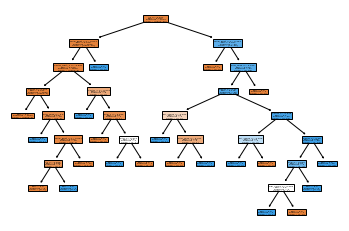

In [ ]:
_ = tree.plot_tree(clf.estimators_[199], feature_names=hof_final_train.drop(columns=['HOF']).columns, filled=True)

In [ ]:
for model in models.keys():    
    hof_final_train[model+'_pred'] = 0
    for i in range(len(hof_final_train)):
        hof_final_train.loc[hof_final_train.index[i],model+'_pred'] = results[model]['y_predictions'][y_index.index(i)]
        hof_final_train.loc[hof_final_train.index[i],model+'_pred_prob'] = results[model]['y_pred_prob'][y_index.index(i)]

In [ ]:
hof_final_train.reset_index(inplace=True)
hof_final_train = hof_final_train.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'), on='Player', how='left')
hof_final_train

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR   WAR  oWAR  \
0      lushbi01       0        0       0         0        0   82   9.0   8.1   
1     lairdge01       0        0       0         0        0   70   6.4   5.1   
2     chaneda01       0        0       0         0        0  -21  -3.4  -0.9   
3     sullico01       0        0       0         0        0   13   0.8   0.4   
4     anderjo03       0        0       0         0        0    4   0.3   0.5   
...         ...     ...      ...     ...       ...      ...  ...   ...   ...   
3371  maguifr01       0        0       0         0        0  -30  -2.6  -4.1   
3372  kunkeje01       0        0       0         0        0   12   0.9   0.8   
3373  smithal01       0        0       0         0        0  -23  -2.3   0.3   
3374  seyboso01       0        1       0         0        0  235  24.5  23.7   
3375  snydefr01       0        0       0         0        0  169  17.5  14.1   

      WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  AS  MVP  \
0            9.0    9.0     8.1          8.1          82       40   0    0   
1            8.0    7.3     4.8          6.2          80       18   0    0   
2            0.2   -0.3     1.2          1.7           9        7   0    0   
3            0.8    0.8     0.4          0.4          13       10   0    0   
4            0.3    0.3     0.5          0.5           4       13   0    0   
...          ...    ...     ...          ...         ...      ...  ..  ...   
3371        -2.6   -2.6    -4.1         -4.1         -30       23   0    0   
3372         1.7    1.7     1.2          1.3          19       20   0    0   
3373        -0.4   -1.8     0.5          1.3          -4        4   0    0   
3374        25.3   25.3    24.0         24.0         240       44   0    0   
3375        16.2   13.1     9.8         14.1         153       46   0    0   

      Rfield  HOF  SVM_pred  SVM_pred_prob  RF_pred  RF_pred_prob  \
0          9    0         0       0.002712        0           0.0   
1         16    0         0       0.002762        0           0.0   
2        -25    0         0       0.003567        0           0.0   
3          4    0         0       0.003172        0           0.0   
4         -1    0         0       0.003158        0           0.0   
...      ...  ...       ...            ...      ...           ...   
3371      19    0         0       0.004686        0           0.0   
3372       1    0         0       0.003190        0           0.0   
3373     -24    0         0       0.004042        0           0.0   
3374       8    0         0       0.000826        0           0.0   
3375      34    0         0       0.002604        0           0.0   

          Player_name  
0          Billy Lush  
1        Gerald Laird  
2       Darrel Chaney  
3       Cory Sullivan  
4       Josh Anderson  
...               ...  
3371  Freddie Maguire  
3372      Jeff Kunkel  
3373      Aleck Smith  
3374    Socks Seybold  
3375     Frank Snyder  

[3376 rows x 24 columns]

## False Negatives

In [ ]:
hof_final_train[(hof_final_train['HOF']!=hof_final_train['SVM_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('SVM_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                     
Edgar Martinez     martied01       1        0       1         1        4  708   
Lou Boudreau       boudrlo01       2        0       0         0        2  614   
Luis Aparicio      aparilu01       0        0       0         0        0  566   
Tim Raines         raineti01       1        0       2         0        1  678   
Eddie Murray       murraed02       1        0       0         1        2  688   
Frank Thomas       thomafr04       0        0       2         3        4  768   
Gabby Hartnett     hartnga01       0        0       0         0        1  571   
Ralph Kiner        kinerra01       0        6       1         1        1  484   
Jim Rice            riceji01       4        2       2         5        3  480   
Willie Stargell    stargwi01       0        2       0         2        1  552   
Pie Traynor        traynpi01       1        0       0         0        1  379   
Mickey Cochrane    cochrmi01       0        0       0         0        0  522   
Tony Pérez         perezto01       1        0       1         1        0  524   
Lou Brock          brocklo01       4        0       4         0        2  433   
Roy Campanella     camparo01       0        0       0         1        2  367   
Rabbit Maranville  maranra01       0        0       0         0        0  404   

                    WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                             
Edgar Martinez     68.5  66.9        43.6   40.7    41.0         44.0   
Lou Boudreau       63.1  50.5        48.8   45.9    37.4         38.8   
Luis Aparicio      55.8  42.3        32.7   26.8    21.9         24.2   
Tim Raines         69.6  69.2        42.5   39.7    38.0         40.3   
Eddie Murray       68.6  62.2        39.2   37.7    34.6         36.1   
Frank Thomas       73.9  80.6        45.5   44.8    50.0         50.0   
Gabby Hartnett     57.1  49.7        31.2   26.8    23.0         27.9   
Ralph Kiner        47.9  52.8        42.7   42.4    45.4         45.4   
Jim Rice           47.8  45.7        36.5   32.4    30.5         34.0   
Willie Stargell    57.5  64.3        38.0   35.7    36.0         39.2   
Pie Traynor        37.5  41.3        26.4   24.6    25.6         27.2   
Mickey Cochrane    49.3  53.2        36.2   36.2    36.9         37.4   
Tony Pérez         54.0  51.0        36.5   36.4    35.3         35.3   
Lou Brock          45.2  48.8        31.9   30.4    27.5         30.8   
Roy Campanella     35.8  32.6        34.4   32.3    29.4         30.8   
Rabbit Maranville  42.9  30.0        30.4   25.8    19.6         21.3   

                   RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                              
Edgar Martinez            454       76   7    4      17    1         0   
Lou Boudreau              476      106   7    5     118    1         0   
Luis Aparicio             321       56  10   10     149    1         0   
Tim Raines                410       71   7    5      -7    1         0   
Eddie Murray              389       71   8    5      61    1         0   
Frank Thomas              473       76   5    6     -67    1         0   
Gabby Hartnett            319       58  10    8      78    1         0   
Ralph Kiner               429       82   6    3     -40    1         0   
Jim Rice                  362       73   8    4      24    1         0   
Willie Stargell           361       72   7    5     -71    1         0   
Pie Traynor               271       46  10    2     -32    1         0   
Mickey Cochrane           388       67   8    3     -40    1         0   
Tony Pérez                341       71   7    4      14    1         0   
Lou Brock                 293       54   6    6     -50    1         0   
Roy Campanella            347       72   8    4      44    1    

In [ ]:
hof_final_train[(hof_final_train['HOF']!=hof_final_train['RF_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                     
Jackie Robinson    robinja02       1        0       2         0        5  621   
Andre Dawson       dawsoan01       0        1       0         1        1  620   
Jim Rice            riceji01       4        2       2         5        3  480   
Lou Boudreau       boudrlo01       2        0       0         0        2  614   
Willie Stargell    stargwi01       0        2       0         2        1  552   
Mickey Cochrane    cochrmi01       0        0       0         0        0  522   
Pie Traynor        traynpi01       1        0       0         0        1  379   
Ralph Kiner        kinerra01       0        6       1         1        1  484   
Tony Pérez         perezto01       1        0       1         1        0  524   
Roy Campanella     camparo01       0        0       0         1        2  367   
Lou Brock          brocklo01       4        0       4         0        2  433   
Rabbit Maranville  maranra01       0        0       0         0        0  404   

                    WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                             
Jackie Robinson    61.7  54.3        51.4   50.9    45.6         45.6   
Andre Dawson       65.1  55.7        42.8   41.4    32.2         35.2   
Jim Rice           47.8  45.7        36.5   32.4    30.5         34.0   
Lou Boudreau       63.1  50.5        48.8   45.9    37.4         38.8   
Willie Stargell    57.5  64.3        38.0   35.7    36.0         39.2   
Mickey Cochrane    49.3  53.2        36.2   36.2    36.9         37.4   
Pie Traynor        37.5  41.3        26.4   24.6    25.6         27.2   
Ralph Kiner        47.9  52.8        42.7   42.4    45.4         45.4   
Tony Pérez         54.0  51.0        36.5   36.4    35.3         35.3   
Roy Campanella     35.8  32.6        34.4   32.3    29.4         30.8   
Lou Brock          45.2  48.8        31.9   30.4    27.5         30.8   
Rabbit Maranville  42.9  30.0        30.4   25.8    19.6         21.3   

                   RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                              
Jackie Robinson           515       95   6    5      81    1         1   
Andre Dawson              400       73   8    9      69    1         1   
Jim Rice                  362       73   8    4      24    1         0   
Lou Boudreau              476      106   7    5     118    1         0   
Willie Stargell           361       72   7    5     -71    1         0   
Mickey Cochrane           388       67   8    3     -40    1         0   
Pie Traynor               271       46  10    2     -32    1         0   
Ralph Kiner               429       82   6    3     -40    1         0   
Tony Pérez                341       71   7    4      14    1         0   
Roy Campanella            347       72   8    4      44    1         0   
Lou Brock                 293       54   6    6     -50    1         0   
Rabbit Maranville         277       46   0    5     130    1         0   

                   SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                              
Jackie Robinson         0.683181        0         0.500  
Andre Dawson            0.451787        0         0.465  
Jim Rice                0.038059        0         0.265  
Lou Boudreau            0.311737        0         0.260  
Willie Stargell         0.029632        0         0.190  
Mickey Cochrane         0.007256        0         0.175  
Pie Traynor             0.025581        0         0.145  
Ralph Kiner             0.062162        0         0.120  
Tony Pérez              0.006318        0         0.075  
Roy Campanella          0.000803        0         0.020  
Lou Brock               0.003292        0         0.015  
Rabbit Maranville       0.000134        0         0.005

## SVM and RF Predict Same for Hall of Famers

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']==1)  & (hof_final_train['RF_pred']==1)&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  \
Player_name                                                                
George Brett       brettge01       3        0       1         1        5   
Joe DiMaggio       dimagjo01       3        2       3         3        4   
Frank Robinson     robinfr02       2        1       4         1        4   
Mike Schmidt       schmimi01       0        8       2         3        1   
Wade Boggs         boggswa01       7        0       3         0        9   
Mel Ott              ottme01       0        1       0         1        0   
Eddie Mathews      matheed01       0        3       3         2        0   
Rod Carew          carewro01       4        0       1         0       11   
Eddie Collins      collied01       3        0       3         0        4   
Tris Speaker       speaktr01       5        0       2         1       10   
Rickey Henderson   henderi01       1        0       7         0        2   
Ken Griffey Jr.    griffke02       0        4       0         3        1   
Joe Morgan         morgajo02       0        0       3         1        2   
Ernie Banks        bankser01       0        4       2         3        0   
Jeff Bagwell       bagweje01       0        2       4         2        1   
Al Simmons         simmoal01       4        0       2         2        8   
Honus Wagner       wagneho01       4        0       5         6        7   
Henry Aaron        aaronha01       8        6       5         5        9   
Cal Ripken Jr.     ripkeca01       3        0       1         0        1   
Robin Yount        yountro01       3        0       2         0        2   
Mickey Mantle      mantlmi01       1        2       7         3        4   
Barry Larkin       larkiba01       1        0       0         0        0   
Al Kaline          kalinal01       3        0       1         1        4   
Stan Musial        musiast01      10        1       6         0       12   
Duke Snider        snidedu01       3        1       3         2        4   
Reggie Jackson     jacksre01       0        3       1         2        0   
Gary Carter        cartega01       0        0       0         0        0   
Chipper Jones      jonesch06       0        0       1         0        4   
Johnny Bench       benchjo01       0        3       1         4        0   
Paul Waner         wanerpa01       6        0       1         0        7   
Roberto Alomar     alomaro01       1        0       3         0        3   
Rogers Hornsby     hornsro01       4        2       3         3        9   
Tony Gwynn         gwynnto01       6        0       1         0       12   
Joe Medwick        medwijo01       6        0       1         0        5   
Yogi Berra         berrayo01       0        0       1         0        1   
Iván Rodríguez     rodriiv01       1        0       0         0        0   
Willie Mays         mayswi01       6        4      10         3        5   
Ryne Sandberg      sandbry01       2        0       3         0        0   
Joe Cronin         cronijo01       0        0       0         0        1   
Derek Jeter        jeterde01       7        0       5         0        7   
Frankie Frisch     friscfr01       1        0       0         0        0   
Carlton Fisk        fiskca01       0        1       0         0        0   
Jim Thome          thomeji01       0        2       0         1        0   
Mike Piazza        piazzmi01       1        0       0         0        4   
Ozzie Smith        smithoz01       0        0       0         0        0   
Bill Dickey        dickebi01       0        0       0         0        1   
Kirby Puckett      puckeki01       6        0       2         2        5   
Larry Walker       walkela01       1        0       1         0        5   
Vladimir Guerrero  guerrvl01       2        0       1         1        6   
Dave Winfield      winfida01       1        1       0         1        2   

                    RAR    WAR   oWAR  WAR_best_7  WAR_7  oWAR_7  oWA

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']==hof_final_train['RF_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  \
Player_name                                                                
George Brett       brettge01       3        0       1         1        5   
Joe DiMaggio       dimagjo01       3        2       3         3        4   
Frank Robinson     robinfr02       2        1       4         1        4   
Mike Schmidt       schmimi01       0        8       2         3        1   
Wade Boggs         boggswa01       7        0       3         0        9   
Eddie Mathews      matheed01       0        3       3         2        0   
Mel Ott              ottme01       0        1       0         1        0   
Eddie Collins      collied01       3        0       3         0        4   
Rod Carew          carewro01       4        0       1         0       11   
Tris Speaker       speaktr01       5        0       2         1       10   
Rickey Henderson   henderi01       1        0       7         0        2   
Ken Griffey Jr.    griffke02       0        4       0         3        1   
Ernie Banks        bankser01       0        4       2         3        0   
Jeff Bagwell       bagweje01       0        2       4         2        1   
Joe Morgan         morgajo02       0        0       3         1        2   
Al Simmons         simmoal01       4        0       2         2        8   
Honus Wagner       wagneho01       4        0       5         6        7   
Robin Yount        yountro01       3        0       2         0        2   
Cal Ripken Jr.     ripkeca01       3        0       1         0        1   
Henry Aaron        aaronha01       8        6       5         5        9   
Barry Larkin       larkiba01       1        0       0         0        0   
Mickey Mantle      mantlmi01       1        2       7         3        4   
Al Kaline          kalinal01       3        0       1         1        4   
Duke Snider        snidedu01       3        1       3         2        4   
Stan Musial        musiast01      10        1       6         0       12   
Reggie Jackson     jacksre01       0        3       1         2        0   
Gary Carter        cartega01       0        0       0         0        0   
Chipper Jones      jonesch06       0        0       1         0        4   
Johnny Bench       benchjo01       0        3       1         4        0   
Paul Waner         wanerpa01       6        0       1         0        7   
Roberto Alomar     alomaro01       1        0       3         0        3   
Rogers Hornsby     hornsro01       4        2       3         3        9   
Tony Gwynn         gwynnto01       6        0       1         0       12   
Joe Medwick        medwijo01       6        0       1         0        5   
Yogi Berra         berrayo01       0        0       1         0        1   
Iván Rodríguez     rodriiv01       1        0       0         0        0   
Willie Mays         mayswi01       6        4      10         3        5   
Ryne Sandberg      sandbry01       2        0       3         0        0   
Derek Jeter        jeterde01       7        0       5         0        7   
Joe Cronin         cronijo01       0        0       0         0        1   
Frankie Frisch     friscfr01       1        0       0         0        0   
Jim Thome          thomeji01       0        2       0         1        0   
Carlton Fisk        fiskca01       0        1       0         0        0   
Ozzie Smith        smithoz01       0        0       0         0        0   
Mike Piazza        piazzmi01       1        0       0         0        4   
Bill Dickey        dickebi01       0        0       0         0        1   
Kirby Puckett      puckeki01       6        0       2         2        5   
Larry Walker       walkela01       1        0       1         0        5   
Vladimir Guerrero  guerrvl01       2        0       1         1        6   
Dave Winfield      winfida01       1        1       0         1        2   
Jim Rice            riceji01       4        2       2         5       

## SVM and RF Predict Opposite for Hall of Famers

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']!=hof_final_train['RF_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                   
Frank Thomas     thomafr04       0        0       2         3        4  768   
Edgar Martinez   martied01       1        0       1         1        4  708   
Tim Raines       raineti01       1        0       2         0        1  678   
Eddie Murray     murraed02       1        0       0         1        2  688   
Luis Aparicio    aparilu01       0        0       0         0        0  566   
Gabby Hartnett   hartnga01       0        0       0         0        1  571   
Jackie Robinson  robinja02       1        0       2         0        5  621   
Andre Dawson     dawsoan01       0        1       0         1        1  620   

                  WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                           
Frank Thomas     73.9  80.6        45.5   44.8    50.0         50.0   
Edgar Martinez   68.5  66.9        43.6   40.7    41.0         44.0   
Tim Raines       69.6  69.2        42.5   39.7    38.0         40.3   
Eddie Murray     68.6  62.2        39.2   37.7    34.6         36.1   
Luis Aparicio    55.8  42.3        32.7   26.8    21.9         24.2   
Gabby Hartnett   57.1  49.7        31.2   26.8    23.0         27.9   
Jackie Robinson  61.7  54.3        51.4   50.9    45.6         45.6   
Andre Dawson     65.1  55.7        42.8   41.4    32.2         35.2   

                 RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                            
Frank Thomas            473       76   5    6     -67    1         0   
Edgar Martinez          454       76   7    4      17    1         0   
Tim Raines              410       71   7    5      -7    1         0   
Eddie Murray            389       71   8    5      61    1         0   
Luis Aparicio           321       56  10   10     149    1         0   
Gabby Hartnett          319       58  10    8      78    1         0   
Jackie Robinson         515       95   6    5      81    1         1   
Andre Dawson            400       73   8    9      69    1         1   

                 SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                            
Frank Thomas          0.111486        1         0.790  
Edgar Martinez        0.335445        1         0.740  
Tim Raines            0.255975        1         0.610  
Eddie Murray          0.231534        1         0.585  
Luis Aparicio         0.274893        1         0.525  
Gabby Hartnett        0.087346        1         0.525  
Jackie Robinson       0.683181        0         0.500  
Andre Dawson          0.451787        0         0.465

## False Positives

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']!=hof_final_train['RF_pred'])&(hof_final_train['HOF']==0)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                   
Bobby Grich      grichbo01       0        0       0         0        0  685   
Rafael Palmeiro  palmera01       2        0       0         1        2  740   
Joe Torre        torrejo01       2        0       0         2        4  545   
Gary Sheffield   sheffga01       0        0       1         1        2  634   

                  WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                           
Bobby Grich      71.3  62.7        46.5   40.0    33.7         38.8   
Rafael Palmeiro  72.1  67.6        38.9   35.6    31.2         35.8   
Joe Torre        57.5  59.5        37.2   32.4    36.0         39.9   
Gary Sheffield   60.4  80.8        38.0   33.2    39.1         44.8   

                 RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                            
Bobby Grich             438       78   6    4      82    0         0   
Rafael Palmeiro         403       71   4    8      50    0         0   
Joe Torre               345       59   9    5     -28    0         0   
Gary Sheffield          394       71   9    6    -196    0         0   

                 SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                            
Bobby Grich           0.266041        1         0.750  
Rafael Palmeiro       0.233170        1         0.605  
Joe Torre             0.255628        1         0.575  
Gary Sheffield        0.270655        1         0.545

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']!=hof_final_train['HOF'])&(hof_final_train['SVM_pred']==1)].set_index('Player_name').sort_values('SVM_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax   RAR  \
Player_name                                                                  
Mark McGwire   mcgwima01       0        6       1         1        0   649   
Manny Ramírez  ramirma02       0        0       1         3        5   726   
Todd Helton    heltoto01       2        0       3         2        5   656   
Pete Rose       rosepe01      12        0       6         0       10   766   
Sammy Sosa      sosasa01       1        3       3         4        1   621   
Barry Bonds    bondsba01       0        5       4         1        6  1650   
Ken Boyer      boyerke01       2        0       0         1        2   611   
Dick Allen     allendi01       1        1       2         1        4   544   
Scott Rolen    rolensc01       0        0       0         0        0   725   

                 WAR   oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                           
Mark McGwire    62.2   65.7        41.9   35.4    39.5         45.8   
Manny Ramírez   69.4   82.0        40.0   38.6    42.1         43.9   
Todd Helton     61.8   54.6        46.7   45.1    41.4         42.1   
Pete Rose       79.8   83.2        45.0   42.3    37.0         42.0   
Sammy Sosa      58.6   50.5        43.8   41.0    39.2         40.4   
Barry Bonds    162.8  143.8        72.7   63.0    63.1         70.4   
Ken Boyer       62.9   56.0        46.3   45.1    39.5         40.0   
Dick Allen      58.6   70.1        45.8   37.5    45.3         51.8   
Scott Rolen     70.2   52.9        43.7   41.8    33.4         35.0   

               RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                          
Mark McGwire          437       79  12    9     -29    0         1   
Manny Ramírez         421       80  12    9    -130    0         1   
Todd Helton           487       96   5    6      76    0         1   
Pete Rose             420       80  17   10     -55    0         1   
Sammy Sosa            462      108   7    8      86    0         1   
Barry Bonds           749      127  14   15     175    0         1   
Ken Boyer             449       80   7    7      74    0         1   
Dick Allen            421       81   7    5    -109    0         1   
Scott Rolen           449       93   7    4     175    0         1   

               SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                          
Mark McGwire        0.993150        1         0.775  
Manny Ramírez       0.982477        1         0.775  
Todd Helton         0.974202        1         0.700  
Pete Rose           0.962164        1         0.870  
Sammy Sosa          0.915442        1         0.630  
Barry Bonds         0.848392        1         0.985  
Ken Boyer           0.740563        1         0.590  
Dick Allen          0.691213        1         0.585  
Scott Rolen         0.534633        1         0.610

In [ ]:
hof_final_train[(hof_final_train['RF_pred']!=hof_final_train['HOF'])&(hof_final_train['RF_pred']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax   RAR  \
Player_name                                                                    
Barry Bonds      bondsba01       0        5       4         1        6  1650   
Pete Rose         rosepe01      12        0       6         0       10   766   
Mark McGwire     mcgwima01       0        6       1         1        0   649   
Manny Ramírez    ramirma02       0        0       1         3        5   726   
Bobby Grich      grichbo01       0        0       0         0        0   685   
Todd Helton      heltoto01       2        0       3         2        5   656   
Sammy Sosa        sosasa01       1        3       3         4        1   621   
Scott Rolen      rolensc01       0        0       0         0        0   725   
Rafael Palmeiro  palmera01       2        0       0         1        2   740   
Ken Boyer        boyerke01       2        0       0         1        2   611   
Dick Allen       allendi01       1        1       2         1        4   544   
Joe Torre        torrejo01       2        0       0         2        4   545   
Gary Sheffield   sheffga01       0        0       1         1        2   634   

                   WAR   oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                             
Barry Bonds      162.8  143.8        72.7   63.0    63.1         70.4   
Pete Rose         79.8   83.2        45.0   42.3    37.0         42.0   
Mark McGwire      62.2   65.7        41.9   35.4    39.5         45.8   
Manny Ramírez     69.4   82.0        40.0   38.6    42.1         43.9   
Bobby Grich       71.3   62.7        46.5   40.0    33.7         38.8   
Todd Helton       61.8   54.6        46.7   45.1    41.4         42.1   
Sammy Sosa        58.6   50.5        43.8   41.0    39.2         40.4   
Scott Rolen       70.2   52.9        43.7   41.8    33.4         35.0   
Rafael Palmeiro   72.1   67.6        38.9   35.6    31.2         35.8   
Ken Boyer         62.9   56.0        46.3   45.1    39.5         40.0   
Dick Allen        58.6   70.1        45.8   37.5    45.3         51.8   
Joe Torre         57.5   59.5        37.2   32.4    36.0         39.9   
Gary Sheffield    60.4   80.8        38.0   33.2    39.1         44.8   

                 RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                            
Barry Bonds             749      127  14   15     175    0         1   
Pete Rose               420       80  17   10     -55    0         1   
Mark McGwire            437       79  12    9     -29    0         1   
Manny Ramírez           421       80  12    9    -130    0         1   
Bobby Grich             438       78   6    4      82    0         0   
Todd Helton             487       96   5    6      76    0         1   
Sammy Sosa              462      108   7    8      86    0         1   
Scott Rolen             449       93   7    4     175    0         1   
Rafael Palmeiro         403       71   4    8      50    0         0   
Ken Boyer               449       80   7    7      74    0         1   
Dick Allen              421       81   7    5    -109    0         1   
Joe Torre               345       59   9    5     -28    0         0   
Gary Sheffield          394       71   9    6    -196    0         0   

                 SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                            
Barry Bonds           0.848392        1         0.985  
Pete Rose             0.962164        1         0.870  
Mark McGwire          0.993150        1         0.775  
Manny Ramírez         0.982477        1         0.775  
Bobby Grich           0.266041        1         0.750  
Todd Helton           0.974202        1         0.700  
Sammy Sosa            0.915442        1         0.630  
Scott Rolen           0.534633        1         0.610  
Rafael Palmeiro       0.233170        1         0.605  
Ken Boyer             0.74

In [ ]:
for model in models.keys():
    if model == 'KNN':
        continue
    print(model)
    TP = len(hof_final_train[(hof_final_train[model+'_pred']==1)&(hof_final_train['HOF']==1)])
    FP = len(hof_final_train[(hof_final_train[model+'_pred']==1)&(hof_final_train['HOF']==0)])
    FN = len(hof_final_train[(hof_final_train[model+'_pred']==0)&(hof_final_train['HOF']==1)])
    precision = np.round_(TP/(TP+FP),2)
    recall = np.round(TP/(TP+FN),2)
    print('TP: ', TP, 'FP:', FP, 'FN:', FN, 'precision:', precision, 'recall:', recall)

SVM
TP:  52 FP: 9 FN: 16 precision: 0.85 recall: 0.76
RF
TP:  56 FP: 13 FN: 12 precision: 0.81 recall: 0.82


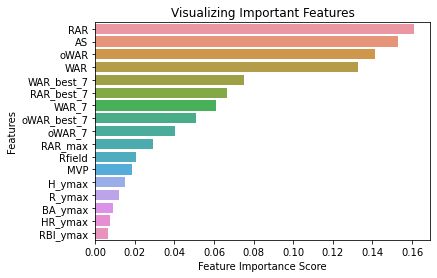

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,
                        index=hof_final_train.columns[1:(1+17)]).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Running on Test Set

In [ ]:
X_train = np.array(hof_final_train.drop(columns=['HOF','SVM_pred','SVM_pred_prob','RF_pred','Player_name','RF_pred_prob']).set_index('Player')) 
y_train = np.array(hof_final_train['HOF'])
X_test = np.array(hof_final_test.drop(columns=['HOF']))
y_test = np.array(hof_final_test['HOF'])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {'SVM': SVC(C=1, gamma='scale',probability=True, kernel = 'rbf'),'RF':RandomForestClassifier(n_estimators=200,random_state=0)}
test_results = {}

for model in models.keys():
    print('Model: ', model)
    clf = models[model].fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_probs = clf.predict_proba(X_test_scaled)
    y_probs = y_probs[:, 1]    
    hof_final_test[model+'_pred'] = y_pred
    hof_final_test[model+'_pred_prob'] = y_probs
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    f1, auc_score = f1_score(y_test, y_pred), auc(recall, precision)    
    print('F1score:', f1, 'AUC:', auc_score)

Model:  SVM
F1score: 0.8749999999999999 AUC: 0.9191353126575774
Model:  RF
F1score: 0.8749999999999999 AUC: 0.9062698782126027


In [ ]:
hof_final_test.reset_index(inplace=True)
hof_final_test = hof_final_test.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'), on='Player', how='left')
hof_final_test

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR   WAR  oWAR  \
0    scharge01       0        0       0         0        0  -44  -4.9  -1.1   
1    hammoje01       0        0       0         0        1   95   8.8   9.6   
2    anderjo01       0        0       0         0        0  276  28.1  28.1   
3    grimera01       0        0       0         0        0  106  10.3  11.6   
4    lavando01       0        0       0         0        0   93   9.2   8.8   
..         ...     ...      ...     ...       ...      ...  ...   ...   ...   
840    orrpe01       0        0       0         0        0    7   0.7  -0.6   
841  briefbu01       0        0       0         0        0    9   0.5   0.7   
842  connafr01       0        0       0         0        0    8   0.8   1.0   
843  o'malto01       0        0       0         0        0   15   1.0   2.2   
844  highadi01       1        0       1         0        0   40   3.8   3.7   

     WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  AS  MVP  \
0          -4.9   -4.9    -1.1         -1.1         -44       -1   0    0   
1          10.4    8.7     8.8          9.8         110       25   1    0   
2          21.3   18.4    18.0         20.8         212       47   0    0   
3          10.3   10.3    11.6         11.6         106       58   0    0   
4          11.8   11.8    10.3         10.4         117       27   0    0   
..          ...    ...     ...          ...         ...      ...  ..  ...   
840         1.0    0.9    -0.4         -0.2          10        6   0    0   
841         0.5    0.5     0.7          0.7           9        3   0    0   
842         0.8    0.8     1.0          1.0           8        8   0    0   
843         1.7    1.0     2.3          2.7          21        9   0    0   
844         3.8    3.8     3.7          3.7          40       21   0    0   

     Rfield  HOF  SVM_pred  SVM_pred_prob  RF_pred  RF_pred_prob  \
0       -34    0         0       0.004964        0           0.0   
1        -6    0         0       0.002410        0           0.0   
2         4    0         0       0.001500        0           0.0   
3       -13    0         0       0.003479        0           0.0   
4         7    0         0       0.002609        0           0.0   
..      ...  ...       ...            ...      ...           ...   
840      12    0         0       0.003169        0           0.0   
841       0    0         0       0.003305        0           0.0   
842       1    0         0       0.003042        0           0.0   
843     -11    0         0       0.002967        0           0.0   
844       3    0         0       0.003150        0           0.0   

           Player_name  
0      George Scharein  
1     Jeffrey Hammonds  
2        John Anderson  
3           Ray Grimes  
4            Doc Lavan  
..                 ...  
840           Pete Orr  
841        Bunny Brief  
842  Frank Connaughton  
843       Tom O'Malley  
844        Dick Higham  

[845 rows x 24 columns]

## False Negatives

In [ ]:
hof_final_test[(hof_final_test['HOF']!=hof_final_test['SVM_pred'])&(hof_final_test['HOF']==1)].set_index('Player_name').sort_values('SVM_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                  
Willie McCovey  mccovwi01       0        2       0         2        1  616   
George Sisler   sislege01       4        0       2         1        5  528   
Willie Keeler   keelewi01       4        0       2         0        3  318   

                 WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                          
Willie McCovey  64.7  72.2        45.0   41.1    41.9         45.5   
George Sisler   53.9  53.2        47.0   47.0    43.6         43.6   
Willie Keeler   31.5  33.2        26.6   26.0    25.4         25.8   

                RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                           
Willie McCovey         410       75   6    7     -78    1         0   
George Sisler          457      101   0    0       6    1         0   
Willie Keeler          264       46   0    0      -4    1         0   

                SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                           
Willie McCovey       0.314115        1         0.570  
George Sisler        0.182743        1         0.525  
Willie Keeler        0.002579        0         0.040

In [ ]:
hof_final_test[(hof_final_test['HOF']!=hof_final_test['RF_pred'])&(hof_final_test['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                    
Harmon Killebrew  killeha01       0        7       1         3        0  601   
Hank Greenberg    greenha01       2        5       4         4        4  590   
Willie Keeler     keelewi01       4        0       2         0        3  318   

                   WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                            
Harmon Killebrew  60.8  71.9        38.3   35.1    40.8         45.6   
Hank Greenberg    55.8  54.4        46.8   40.9    40.1         45.3   
Willie Keeler     31.5  33.2        26.6   26.0    25.4         25.8   

                  RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                             
Harmon Killebrew         376       61  11    5     -79    1         1   
Hank Greenberg           499       83   0    2      17    1         1   
Willie Keeler            264       46   0    0      -4    1         0   

                  SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                             
Harmon Killebrew       0.717551        0         0.445  
Hank Greenberg         0.460497        0         0.385  
Willie Keeler          0.002579        0         0.040

In [ ]:
hof_final_test[(hof_final_test['SVM_pred']!=hof_final_test['RF_pred'])&(hof_final_test['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  RAR  \
Player_name                                                                    
Willie McCovey    mccovwi01       0        2       0         2        1  616   
George Sisler     sislege01       4        0       2         1        5  528   
Harmon Killebrew  killeha01       0        7       1         3        0  601   
Hank Greenberg    greenha01       2        5       4         4        4  590   

                   WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                            
Willie McCovey    64.7  72.2        45.0   41.1    41.9         45.5   
George Sisler     53.9  53.2        47.0   47.0    43.6         43.6   
Harmon Killebrew  60.8  71.9        38.3   35.1    40.8         45.6   
Hank Greenberg    55.8  54.4        46.8   40.9    40.1         45.3   

                  RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                             
Willie McCovey           410       75   6    7     -78    1         0   
George Sisler            457      101   0    0       6    1         0   
Harmon Killebrew         376       61  11    5     -79    1         1   
Hank Greenberg           499       83   0    2      17    1         1   

                  SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                             
Willie McCovey         0.314115        1         0.570  
George Sisler          0.182743        1         0.525  
Harmon Killebrew       0.717551        0         0.445  
Hank Greenberg         0.460497        0         0.385

In [ ]:
hof_final_test[(hof_final_test['SVM_pred']==1) & (hof_final_test['RF_pred']==1) & (hof_final_test['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax   RAR  \
Player_name                                                                     
Jimmie Foxx        foxxji01       3        4       4         3        5  1011   
Nap Lajoie        lajoina01       6        0       1         5        6  1020   
Carl Yastrzemski  yastrca01       2        1       3         1        3   925   
Harry Heilmann    heilmha01       3        0       0         1        5   739   
Ted Williams      willite01       3        2       7         6       12  1234   
Ty Cobb            cobbty01      11        1       8         5       15  1433   
Brooks Robinson   robinbr01       2        0       0         1        3   756   
Craig Biggio      biggicr01       1        0       3         0        0   686   
Paul Molitor      molitpa01       7        0       3         0        6   767   
Babe Ruth          ruthba01       2       11      10         9        6  1707   
Billy Williams    willibi01       4        2       3         1        3   600   
Bill Terry        terrybi01       4        0       0         0        4   566   

                    WAR   oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                              
Jimmie Foxx        92.9   91.5        58.6   55.6    53.0         57.4   
Nap Lajoie        107.2   98.0        60.0   53.3    44.3         52.0   
Carl Yastrzemski   96.4   78.4        55.5   52.4    42.5         46.0   
Harry Heilmann     71.9   76.8        47.0   47.0    48.8         48.8   
Ted Williams      121.9  125.1        67.9   64.7    64.3         67.1   
Ty Cobb           151.2  151.6        69.1   62.8    62.1         67.6   
Brooks Robinson    78.4   47.8        45.9   42.2    29.3         31.3   
Craig Biggio       65.5   76.4        41.8   41.7    41.6         42.1   
Paul Molitor       75.7   75.4        39.6   35.8    36.2         39.8   
Babe Ruth         162.1  154.6        84.8   72.3    69.4         80.1   
Billy Williams     63.8   66.6        41.5   36.7    36.1         41.4   
Bill Terry         55.9   49.3        42.8   41.6    36.7         37.8   

                  RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                             
Jimmie Foxx              638      116  13    5      19    1         1   
Nap Lajoie               548       93   0    2      83    1         1   
Carl Yastrzemski         515      112  18   13     183    1         1   
Harry Heilmann           489       96   0    2     -44    1         1   
Ted Williams             679      110  17    6     -32    1         1   
Ty Cobb                  639      108   0    2       0    1         1   
Brooks Robinson          429       78  15   12     294    1         1   
Craig Biggio             436       97   7    5    -101    1         1   
Paul Molitor             402       63   7    9       7    1         1   
Babe Ruth                903      147   5    0      79    1         1   
Billy Williams           382       73   6    5     -38    1         1   
Bill Terry               438       89   8    1      73    1         1   

                  SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                             
Jimmie Foxx            0.995217        1         1.000  
Nap Lajoie             0.955292        1         0.995  
Carl Yastrzemski       0.996494        1         0.975  
Harry Heilmann         0.681375        1         0.960  
Ted Williams           0.892997        1         0.930  
Ty Cobb                0.798968        1         0.820  
Brooks Robinson        0.991800        1         0.710  
Craig Biggio           0.746066        1         0.690  
Paul Molitor           0.987721        1         0.655  
Babe Ruth              0.706576        1         0.640  
Billy Williams         0.620991        1         0.540  
Bill Terry             0.603028        1         0.525

## False Positives

In [ ]:
hof_final_test[((hof_final_test['SVM_pred']==1) | (hof_final_test['RF_pred']==1))&(hof_final_test['HOF']==0)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  \
Player_name                                                                   
Shoeless Joe Jackson  jacksjo01       5        0       0         0        6   

                      RAR   WAR  oWAR  WAR_best_7  WAR_7  oWAR_7  oWAR_best_7  \
Player_name                                                                     
Shoeless Joe Jackson  593  62.3  61.2        52.5   47.3    46.1         50.7   

                      RAR_best_7  RAR_max  AS  MVP  Rfield  HOF  SVM_pred  \
Player_name                                                                 
Shoeless Joe Jackson         502       93   0    0      11    0         1   

                      SVM_pred_prob  RF_pred  RF_pred_prob  
Player_name                                                 
Shoeless Joe Jackson       0.633189        1         0.715

## Final Results

In [ ]:
for model in models.keys():
    print(model)
    TP = len(hof_final_test[(hof_final_test[model+'_pred']==1)&(hof_final_test['HOF']==1)])
    FP = len(hof_final_test[(hof_final_test[model+'_pred']==1)&(hof_final_test['HOF']==0)])
    FN = len(hof_final_test[(hof_final_test[model+'_pred']==0)&(hof_final_test['HOF']==1)])
    precision = np.round_(TP/(TP+FP),2)
    recall = np.round(TP/(TP+FN),2)
    print('TP: ', TP, 'FP:', FP, 'FN:', FN, 'precision:', precision, 'recall:', recall)

SVM
TP:  14 FP: 1 FN: 3 precision: 0.93 recall: 0.82
RF
TP:  14 FP: 1 FN: 3 precision: 0.93 recall: 0.82


## Current Players

In [ ]:
def data_prep(df_main, features):
    df = df_main.copy()
    col_avail = [x for x in features if x in df.columns]
    col_add = [x for x in features if x not in df.columns]
    for col in col_add:          
        if col == 'AS' or col == 'MVP':
            df[col] = df['Player'].apply(lambda x:awards(x,col,n=10))            
            continue
        info = col.split('_')
        if info[-1].isnumeric() and 'best' not in info:
            df[col]= df['Player'].apply(lambda x:rolling_max(x,int(info[-1]),info[0]))
        elif info[-1].isnumeric():
            df[col]= df['Player'].apply(lambda x:bestof(x,int(info[-1]),info[0]))
        elif info[-1] == 'BA':
            df[col] = np.where(((df['H']>3000)&(df['BA']>0.300)),1,0)
        elif info[-1] == 'ymax':
            df[col] = df['Player'].apply(lambda x:year_max(x,info[0]))        
        elif info[-1] == 'max':
            df[col] = df['Player'].apply(lambda x:col_max(x,info[0]))
    df = df[['Player']+col_add+col_avail]
    if 'HOF' in col_avail:
        df.drop(columns=['HOF'], inplace=True)
    df.set_index('Player', inplace=True)
    return df

In [ ]:
df_current = career_stats(df_bat)
df_current = df_current[['Player'] + ['G', 'AB', 'R', 'H','2B','3B', 'HR','RBI', 'SB','BA', 'SLG','OPS', 'TB','Rbat','WAA','RAR','oRAR','RE24','Pos_mean','HOF','WAR','oWAR', 'Rbat+','Rfield','Rbaser','last_game']] #'BB', 'SO', 'SB'
df_current = df_current.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
df_current = df_current[df_current['last_game']>2015]
df_current.reset_index(drop=True, inplace=True)
df_current.dropna(inplace=True)
df_current

Player     G      AB      R       H     2B    3B     HR     RBI  \
0    abreujo02   994  3908.0  544.0  1142.0  238.0  14.0  205.0   699.0   
1    ackledu01   635  2125.0  261.0   512.0   94.0  18.0   46.0   216.0   
2    acunaro01   346  1341.0  283.0   380.0   66.0   7.0   92.0   217.0   
3    adamewi01   326  1118.0  152.0   284.0   51.0   3.0   42.0   120.0   
4    adamsma01   844  2401.0  295.0   620.0  129.0   6.0  118.0   397.0   
..         ...   ...     ...    ...     ...    ...   ...    ...     ...   
631  younger03   645  1724.0  273.0   422.0   67.0  22.0   13.0   112.0   
632  zimmebr01   164   455.0   59.0   102.0   20.0   2.0   11.0    51.0   
633  zimmery01  1710  6457.0  942.0  1802.0  404.0  22.0  274.0  1025.0   
634  zobribe01  1651  5880.0  884.0  1566.0  349.0  44.0  167.0   768.0   
635  zuninmi01   728  2299.0  259.0   462.0  102.0   3.0  115.0   298.0   

        SB        BA       SLG       OPS      TB  Rbat   WAA  RAR  oRAR  \
0     11.0  0.292221  0.517656  0.849975  2023.0   182  10.6  244   255   
1     31.0  0.240941  0.367059  0.669414   780.0   -21  -0.5   76    68   
2     67.0  0.283371  0.548844  0.909829   736.0    71   7.8  130   119   
3     13.0  0.254025  0.417710  0.732042   467.0     4   3.6   75    69   
4      4.0  0.258226  0.464390  0.768349  1115.0     5  -3.2   61    51   
..     ...       ...       ...       ...     ...   ...   ...  ...   ...   
631  161.0  0.244780  0.331787  0.628141   572.0   -52  -4.7   22    24   
632   24.0  0.224176  0.349451  0.632059   159.0   -19  -0.3   16    10   
633   43.0  0.279077  0.475763  0.817613  3072.0   146  17.7  410   360   
634  116.0  0.266327  0.425850  0.780112  2504.0   124  21.5  440   389   
635    2.0  0.200957  0.397999  0.647604   915.0   -52  -1.3   72    73   

      RE24   Pos_mean  HOF   WAR  oWAR       Rbat+  Rfield  Rbaser  last_game  \
0    192.2   0.845070    0  25.3  26.1  137.375000     -11      -9       2021   
1     -7.4   5.486614    0   7.8   6.7   81.333333       9       2       2016   
2     93.8   3.965318    0  12.5  11.8  149.500000      10       7       2021   
3    -25.2  13.484663    0   7.7   6.9  101.750000       6       3       2021   
4     44.5   0.675355    0   4.9   4.1   85.600000      11     -10       2021   
..     ...        ...  ...   ...   ...         ...     ...     ...        ...   
631  -14.1   3.031008    0   1.4   1.7   69.000000      -4      19       2018   
632  -20.4   4.603659    0   1.6   0.9   39.000000       6       5       2021   
633  194.5   4.877193    0  39.5  34.9  120.062500      48       9       2021   
634  151.1   6.477892    0  44.6  39.3  103.857143      51      10       2019   
635  -73.7  19.642857    0   7.4   7.3   85.666667      -1      -6       2021   

          Player_name  
0          José Abreu  
1       Dustin Ackley  
2    Ronald Acuña Jr.  
3        Willy Adames  
4          Matt Adams  
..                ...  
631    Eric Young Jr.  
632    Bradley Zimmer  
633    Ryan Zimmerman  
634       Ben Zobrist  
635       Mike Zunino  

[636 rows x 28 columns]

In [ ]:
# features = list(hof_final_train.drop(columns=['SVM_pred', 'SVM_pred_prob', 'RF_pred', 'RF_pred_prob', 'Player', 'Player_name']).columns)
# df_prep = data_prep(df_current, features)
# df_prep

# df_prep.to_csv('df_prep.csv')

df_prep = pd.read_csv('asset/df_prep.csv', index_col=0)
df_prep

H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  WAR_best_7  WAR_7  \
Player                                                                     
abreujo02       1        1       0         3        1        24.6   24.6   
ackledu01       0        0       0         0        0         7.8    7.8   
acunaro01       0        1       3         0        0        12.5   12.5   
adamewi01       0        0       0         0        0         7.7    7.7   
adamsma01       0        0       0         0        0         5.6    5.6   
...           ...      ...     ...       ...      ...         ...    ...   
younger03       0        0       0         0        0         2.5    2.2   
zimmebr01       0        0       0         0        0         1.6    1.6   
zimmery01       0        0       0         0        0        31.2   30.2   
zobribe01       0        0       0         0        0        39.7   38.7   
zuninmi01       0        0       0         0        0         8.3    7.0   

           oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  AS  MVP  RAR   WAR  oWAR  \
Player                                                                          
abreujo02    25.5         25.5         238       54   3    5  244  25.3  26.1   
ackledu01     6.7          6.7          76       36   0    0   76   7.8   6.7   
acunaro01    11.8         11.8         130       53   1    3  130  12.5  11.8   
adamewi01     6.9          6.9          75       39   0    0   75   7.7   6.9   
adamsma01     5.0          5.0          67       24   0    0   61   4.9   4.1   
...           ...          ...         ...      ...  ..  ...  ...   ...   ...   
younger03     2.3          2.5          29       17   0    0   22   1.4   1.7   
zimmebr01     0.9          0.9          16       16   0    0   16   1.6   0.9   
zimmery01    25.2         27.4         317       73   2    4  410  39.5  34.9   
zobribe01    31.7         32.8         388       88   3    2  440  44.6  39.3   
zuninmi01     6.4          8.5          80       34   0    0   72   7.4   7.3   

           Rfield  
Player             
abreujo02     -11  
ackledu01       9  
acunaro01      10  
adamewi01       6  
adamsma01      11  
...           ...  
younger03      -4  
zimmebr01       6  
zimmery01      48  
zobribe01      51  
zuninmi01      -1  

[636 rows x 17 columns]

In [ ]:
X_train = np.array(hof_final_train.drop(columns=['HOF','SVM_pred','SVM_pred_prob','RF_pred','RF_pred_prob','Player_name']).set_index('Player'))
y_train = np.array(hof_final_train['HOF'])

X_test = np.array(df_prep)
                  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
                  
## RFC parameters from above
clf = RandomForestClassifier(n_estimators=200,random_state=0)
clf.fit(X_train_scaled,y_train)

df_prep['RF_pred'] = clf.predict(X_test_scaled)
y_probs = clf.predict_proba(X_test_scaled)

df_prep['RF_pred_prob'] = y_probs[:,1]
df_prep.reset_index(inplace=True)

df_prep = df_prep.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
df_prep

Player  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  WAR_best_7  WAR_7  \
0    abreujo02       1        1       0         3        1        24.6   24.6   
1    ackledu01       0        0       0         0        0         7.8    7.8   
2    acunaro01       0        1       3         0        0        12.5   12.5   
3    adamewi01       0        0       0         0        0         7.7    7.7   
4    adamsma01       0        0       0         0        0         5.6    5.6   
..         ...     ...      ...     ...       ...      ...         ...    ...   
631  younger03       0        0       0         0        0         2.5    2.2   
632  zimmebr01       0        0       0         0        0         1.6    1.6   
633  zimmery01       0        0       0         0        0        31.2   30.2   
634  zobribe01       0        0       0         0        0        39.7   38.7   
635  zuninmi01       0        0       0         0        0         8.3    7.0   

     oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  AS  MVP  RAR   WAR  oWAR  \
0      25.5         25.5         238       54   3    5  244  25.3  26.1   
1       6.7          6.7          76       36   0    0   76   7.8   6.7   
2      11.8         11.8         130       53   1    3  130  12.5  11.8   
3       6.9          6.9          75       39   0    0   75   7.7   6.9   
4       5.0          5.0          67       24   0    0   61   4.9   4.1   
..      ...          ...         ...      ...  ..  ...  ...   ...   ...   
631     2.3          2.5          29       17   0    0   22   1.4   1.7   
632     0.9          0.9          16       16   0    0   16   1.6   0.9   
633    25.2         27.4         317       73   2    4  410  39.5  34.9   
634    31.7         32.8         388       88   3    2  440  44.6  39.3   
635     6.4          8.5          80       34   0    0   72   7.4   7.3   

     Rfield  RF_pred  RF_pred_prob       Player_name  
0       -11        0         0.415        José Abreu  
1         9        0         0.225     Dustin Ackley  
2        10        0         0.400  Ronald Acuña Jr.  
3         6        0         0.230      Willy Adames  
4        11        0         0.120        Matt Adams  
..      ...      ...           ...               ...  
631      -4        0         0.000    Eric Young Jr.  
632       6        0         0.000    Bradley Zimmer  
633      48        0         0.430    Ryan Zimmerman  
634      51        0         0.475       Ben Zobrist  
635      -1        0         0.145       Mike Zunino  

[636 rows x 21 columns]

In [ ]:
dfFinal = df_prep.sort_values(by='RF_pred_prob',ascending=False).drop(columns=['Player'])
dfFinal = dfFinal[(dfFinal['RF_pred_prob']>=0.47)].set_index('Player_name')
dfFinal[dfFinal.columns.tolist()[11:]+dfFinal.columns.tolist()[:11]]

AS  MVP   RAR    WAR   oWAR  Rfield  RF_pred  RF_pred_prob  \
Player_name                                                                    
Mike Trout         8    8   753   76.2   76.2      -4        1         0.660   
Álex Rodríguez    14   15  1225  117.7  115.3      23        1         0.660   
Albert Pujols     10    9  1010   99.5   85.2     141        1         0.650   
Robinson Canó      8    6   684   69.3   68.6       6        1         0.570   
Mookie Betts       4    6   462   47.0   33.9     125        1         0.565   
Miguel Cabrera    11   11   685   68.8   78.5     -97        1         0.550   
Chase Utley        6    5   660   64.5   51.5     131        1         0.540   
Ichiro Suzuki     10    9   619   60.0   47.8     120        1         0.535   
Paul Goldschmidt   6    7   451   44.9   40.6      45        1         0.520   
Andrew McCutchen   5    4   451   44.6   53.3     -78        1         0.520   
Dustin Pedroia     4    3   507   52.0   41.5      99        1         0.515   
Adrián Beltré      4    6   933   93.7   71.6     216        0         0.495   
Josh Donaldson     3    4   408   41.8   38.9      27        0         0.490   
Buster Posey       6    6   428   42.9   38.5      43        0         0.485   
Mark Teixeira      3    7   515   50.7   41.9      88        0         0.480   
Joey Votto         6    3   612   60.4   55.8      48        0         0.480   
Evan Longoria      3    5   560   56.6   46.8      98        0         0.475   
Ben Zobrist        3    2   440   44.6   39.3      51        0         0.475   
David Ortiz       10    7   554   55.3   57.0     -16        0         0.470   
José Bautista      6    3   361   36.5   40.3     -36        0         0.470   

                  H_ymax  HR_ymax  R_ymax  RBI_ymax  BA_ymax  WAR_best_7  \
Player_name                                                                
Mike Trout             1        1       3         1        4        64.9   
Álex Rodríguez         2        4       7         3        3        64.3   
Albert Pujols          1        3       6         4        6        61.7   
Robinson Canó          5        0       0         1        4        49.2   
Mookie Betts           2        0       4         0        2        45.9   
Miguel Cabrera         3        1       1         4        9        44.8   
Chase Utley            1        0       3         0        1        49.2   
Ichiro Suzuki         10        0       0         0        6        43.7   
Paul Goldschmidt       1        0       0         2        1        39.5   
Andrew McCutchen       1        0       0         0        3        38.3   
Dustin Pedroia         4        0       2         0        1        41.1   
Adrián Beltré          1        1       0         0        3        48.8   
Josh Donaldson         0        0       2         1        0        39.8   
Buster Posey           0        0       0         0        4        36.7   
Mark Teixeira          0        1       1         1        0        38.0   
Joey Votto             0        0       1         0        5        46.8   
Evan Longoria          0        0       0         0        0        41.9   
Ben Zobrist            0        0       0         0        0        39.7   
David Ortiz            0        2       1         4        2        35.3   
José Bautista          0        2       1         1        0        38.2   

                  WAR_7  oWAR_7  oWAR_best_7  RAR_best_7  RAR_max  
Player_name                                                        
Mike Trout         64.0    62.7         63.5         638      105  
Álex Rodríguez     57.7    56.3         62.0         681      114  
Albert Pujols      61.7    51.5         52.5         636       98  
Robinson Canó      46.0    42.8         43.0         481       83  
Mookie Betts       45.9    32.8         32.8         451      106  
Miguel Cabrera     43.8    47.1         49.5         449       76  
Chase Utley        49.2    36.5         

## Predicting HoF Throughout a Player Career

In [ ]:
dfCareer = career_stats(df_bat)
dfCareer = dfCareer[dfCareer['HOF']==1]
players = dfCareer['Player'].tolist()
df_bat2 = df_bat[df_bat['Player'].isin(players)]
df_bat2

Year  Age   Tm  Lg  G_bat     PA     AB      R      H    2B    3B  \
0      1954.0   20  MLN  NL  122.0  509.0  468.0   58.0  131.0  27.0   6.0   
1      1955.0   21  MLN  NL  153.0  665.0  602.0  105.0  189.0  37.0   9.0   
2      1956.0   22  MLN  NL  153.0  660.0  609.0  106.0  200.0  34.0  14.0   
3      1957.0   23  MLN  NL  151.0  675.0  615.0  118.0  198.0  27.0   6.0   
4      1958.0   24  MLN  NL  153.0  664.0  601.0  109.0  196.0  34.0   4.0   
...       ...  ...  ...  ..    ...    ...    ...    ...    ...   ...   ...   
42842  1989.0   33  MIL  AL  160.0  690.0  614.0  101.0  195.0  38.0   9.0   
42843  1990.0   34  MIL  AL  158.0  683.0  587.0   98.0  145.0  17.0   5.0   
42844  1991.0   35  MIL  AL  130.0  571.0  503.0   66.0  131.0  20.0   4.0   
42845  1992.0   36  MIL  AL  150.0  629.0  557.0   71.0  147.0  40.0   3.0   
42846  1993.0   37  MIL  AL  127.0  514.0  454.0   62.0  117.0  25.0   3.0   

         HR    RBI    SB   CS    BB    SO     BA    OBP    SLG    OPS   OPS+  \
0      13.0   69.0   2.0  2.0  28.0  39.0  0.280  0.322  0.447  0.769  104.0   
1      27.0  106.0   3.0  1.0  49.0  61.0  0.314  0.366  0.540  0.906  141.0   
2      26.0   92.0   2.0  4.0  37.0  54.0  0.328  0.365  0.558  0.923  151.0   
3      44.0  132.0   1.0  1.0  57.0  58.0  0.322  0.378  0.600  0.978  166.0   
4      30.0   95.0   4.0  1.0  59.0  49.0  0.326  0.386  0.546  0.931  153.0   
...     ...    ...   ...  ...   ...   ...    ...    ...    ...    ...    ...   
42842  21.0  103.0  19.0  3.0  63.0  71.0  0.318  0.384  0.511  0.896  152.0   
42843  17.0   77.0  15.0  8.0  78.0  89.0  0.247  0.337  0.380  0.717  102.0   
42844  10.0   77.0   6.0  4.0  54.0  79.0  0.260  0.332  0.376  0.707   98.0   
42845   8.0   77.0  15.0  6.0  53.0  81.0  0.264  0.325  0.390  0.714  102.0   
42846   8.0   51.0   9.0  2.0  44.0  93.0  0.258  0.326  0.379  0.705   90.0   

          TB   GDP  HBP   SH    SF   IBB Pos_bat       Awards  marker    G  \
0      209.0  13.0  3.0  6.0   4.0   0.0   *79/H        RoY-4       1  122   
1      325.0  20.0  3.0  7.0   4.0   5.0  *974/H     AS,MVP-9       1  153   
2      340.0  21.0  2.0  5.0   7.0   6.0    *9/H     AS,MVP-3       1  153   
3      369.0  13.0  0.0  0.0   3.0  15.0   *98/H     AS,MVP-1       1  151   
4      328.0  21.0  1.0  0.0   3.0  16.0     *98  AS,MVP-3,GG       1  153   
...      ...   ...  ...  ...   ...   ...     ...          ...     ...  ...   
42842  314.0   9.0  6.0  3.0   4.0   9.0     *8D     MVP-1,SS       1  160   
42843  223.0   7.0  6.0  4.0   8.0   6.0    *8/D          NaN       1  158   
42844  189.0  13.0  4.0  1.0   9.0   8.0   *8D/H          NaN       1  130   
42845  217.0   9.0  3.0  4.0  12.0   9.0   *8D/H          NaN       1  150   
42846  172.0  12.0  5.0  5.0   6.0   5.0  *8/3DH          NaN       1  127   

       Rbat  Rbaser  Rdp  Rfield  Rpos  RAA  WAA  Rrep  RAR  WAR  waaWL%  \
0         5      -2   -1      -1    -5   -4 -0.5    19   16  1.4   0.497   
1        37       2   -1       7    -5   40  3.8    25   65  6.2   0.527   
2        41       0   -1      15    -7   47  4.6    24   72  7.2   0.533   
3        53       2    0       4    -4   55  5.5    25   80  8.0   0.538   
4        44       4   -2       8    -6   48  4.8    25   72  7.3   0.532   
...     ...     ...  ...     ...   ...  ...  ...   ...  ...  ...     ...   
42842    40       3    2     -14     1   32  3.5    24   56  5.8   0.521   
42843     2       3    1      -7     3    2  0.2    24   26  2.5   0.501   
42844     0       0   -2     -10     1  -11 -1.0    20    9  0.9   0.492   
42845     3       0    1     -12     2   -6 -0.6    24   17  1.7   0.496   
42846    -8       3   -1       7     2    3  0.3    19   22  2.1   0.502   

       162WL%  oWAR  dWAR  oRAR     Salary   rOBA  Rbat+  BAbip    ISO  HR%  \
0       0.498   1.6  -0.7    17     6000.0  0.356  109.0  0.281  0.167  2.6   
1       0.525   5.8   0.0    58    10000.0  0.406  149.0  0.313  0.226  4.1   
2       0.531   6.0   0.

In [ ]:
features = ['H_ymax','HR_ymax','R_ymax','RBI_ymax','BA_ymax','RAR','WAR','oWAR','WAR_best_7','WAR_7',
            'oWAR_7','oWAR_best_7','RAR_best_7','RAR_max','AS','MVP','Rfield','HOF']

In [ ]:
def player_stats(main, features, clf, predType = 'binary', df = df_bat):    
    player_main = career_stats(df)[['Player']]
    player_main = player_main.merge(df[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')

    col_avail = [x for x in features if x in df.columns]
    col_add = [x for x in features if x not in df.columns]
    req_extra = ['last_game','HR', 'AB', '2B', '3B', 'H','R', 'RBI', 'G','BA', 'TB']
    col_extra = [x for x in req_extra if x not in col_avail]
    season_max = df[['Player', main]].groupby(['Player']).agg('max').reset_index()
    start = min(df[main])
    if main == 'Season':
        start = 1
    for i in range(start, max(df[main])+1):
        #print(main+ ' '+str(i))
        temp_main = df[df[main]<=i]
        temp_main = temp_main[temp_main['Player'].isin(player_main['Player'])]
        temp_main = temp_main[temp_main['Player'].isin(season_max[season_max[main]>=i]['Player'])]
        temp = career_stats(temp_main)
        temp_main = temp_main[['Player'] + col_avail+col_extra+['Pos_adjust','Year','Awards']]
        temp = temp[['Player'] + col_avail+col_extra]
        temp = temp.merge(df[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
        temp.reset_index(drop=True, inplace=True)
        temp.dropna(inplace=True)    
        for col in col_add:          
            if col == 'AS' or col == 'MVP':
                temp[col] = temp['Player'].apply(lambda x:awards(x,col,df=temp_main,n=10))            
                continue
            info = col.split('_')
            if info[-1].isnumeric() and 'best' not in info:
                temp[col]= temp['Player'].apply(lambda x:rolling_max(x,int(info[-1]),info[0], df=temp_main))
            elif info[-1].isnumeric():
                temp[col]= temp['Player'].apply(lambda x:bestof(x,int(info[-1]),info[0], df=temp_main))
            elif info[-1] == 'ymax':
                temp[col] = temp['Player'].apply(lambda x:year_max(x,info[0],df = temp_main))        
            elif info[-1] == 'max':
                temp[col] = temp['Player'].apply(lambda x:col_max(x,info[0],df = temp_main))
        temp.drop(columns=col_extra, inplace=True)    
        temp.dropna(inplace=True)
        X = np.array(temp[col_add+col_avail].drop(columns=['HOF']))
        if X.shape[0]==0:
            continue
        x_scaled = scaler.transform(X)
        
        if predType == 'binary':
            y_probs = clf.predict(x_scaled)
        elif predType == 'proba':
            y_probs = clf.predict_proba(x_scaled)
            y_probs = y_probs[:, 1]
            
        temp[str(i)] = y_probs
        player_main = player_main.merge(temp[['Player',str(i)]], on='Player', how='left')
        player_main
    return player_main

# playerSeasonFullValue = player_stats('Season', features, clf, predType = 'proba', df = df_bat2)
# playerSeasonFullBinary = player_stats('Season', features, clf, predType = 'binary', df = df_bat2)
# playerSeasonFullValue.to_csv('playerSeasonFullValueHOF.csv')
# playerSeasonFullBinary.to_csv('playerSeasonFullBinaryHOF.csv')

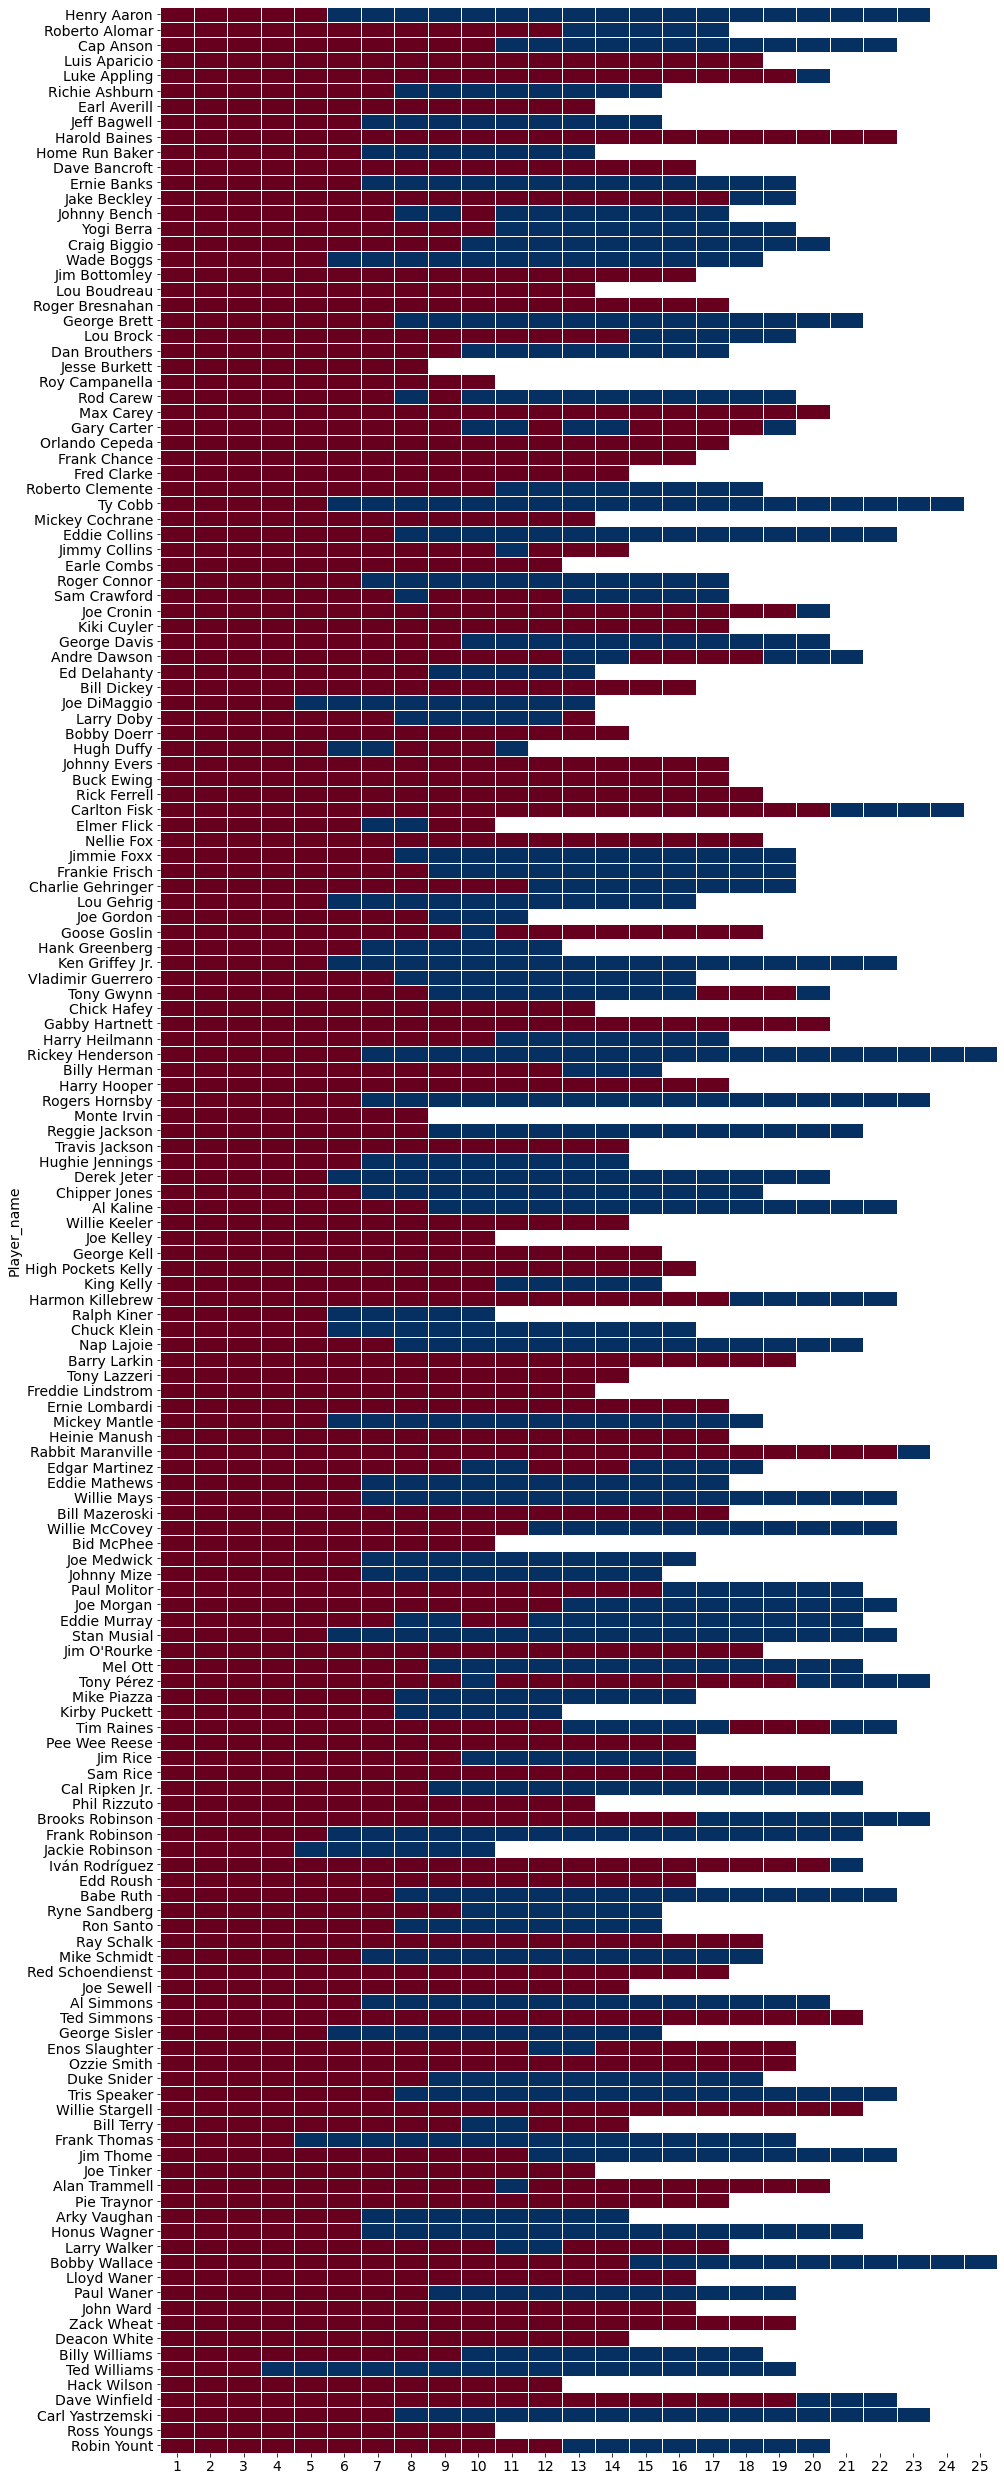

In [ ]:
playerSeasonFullBinary = pd.read_csv('asset/playerSeasonFullBinaryHOF.csv', index_col=0)

plt.figure(figsize = (15,45))
pf = playerSeasonFullBinary.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(['Billy Hamilton', 'Sam Thompson', 'Tommy McCarthy'], axis=0, inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

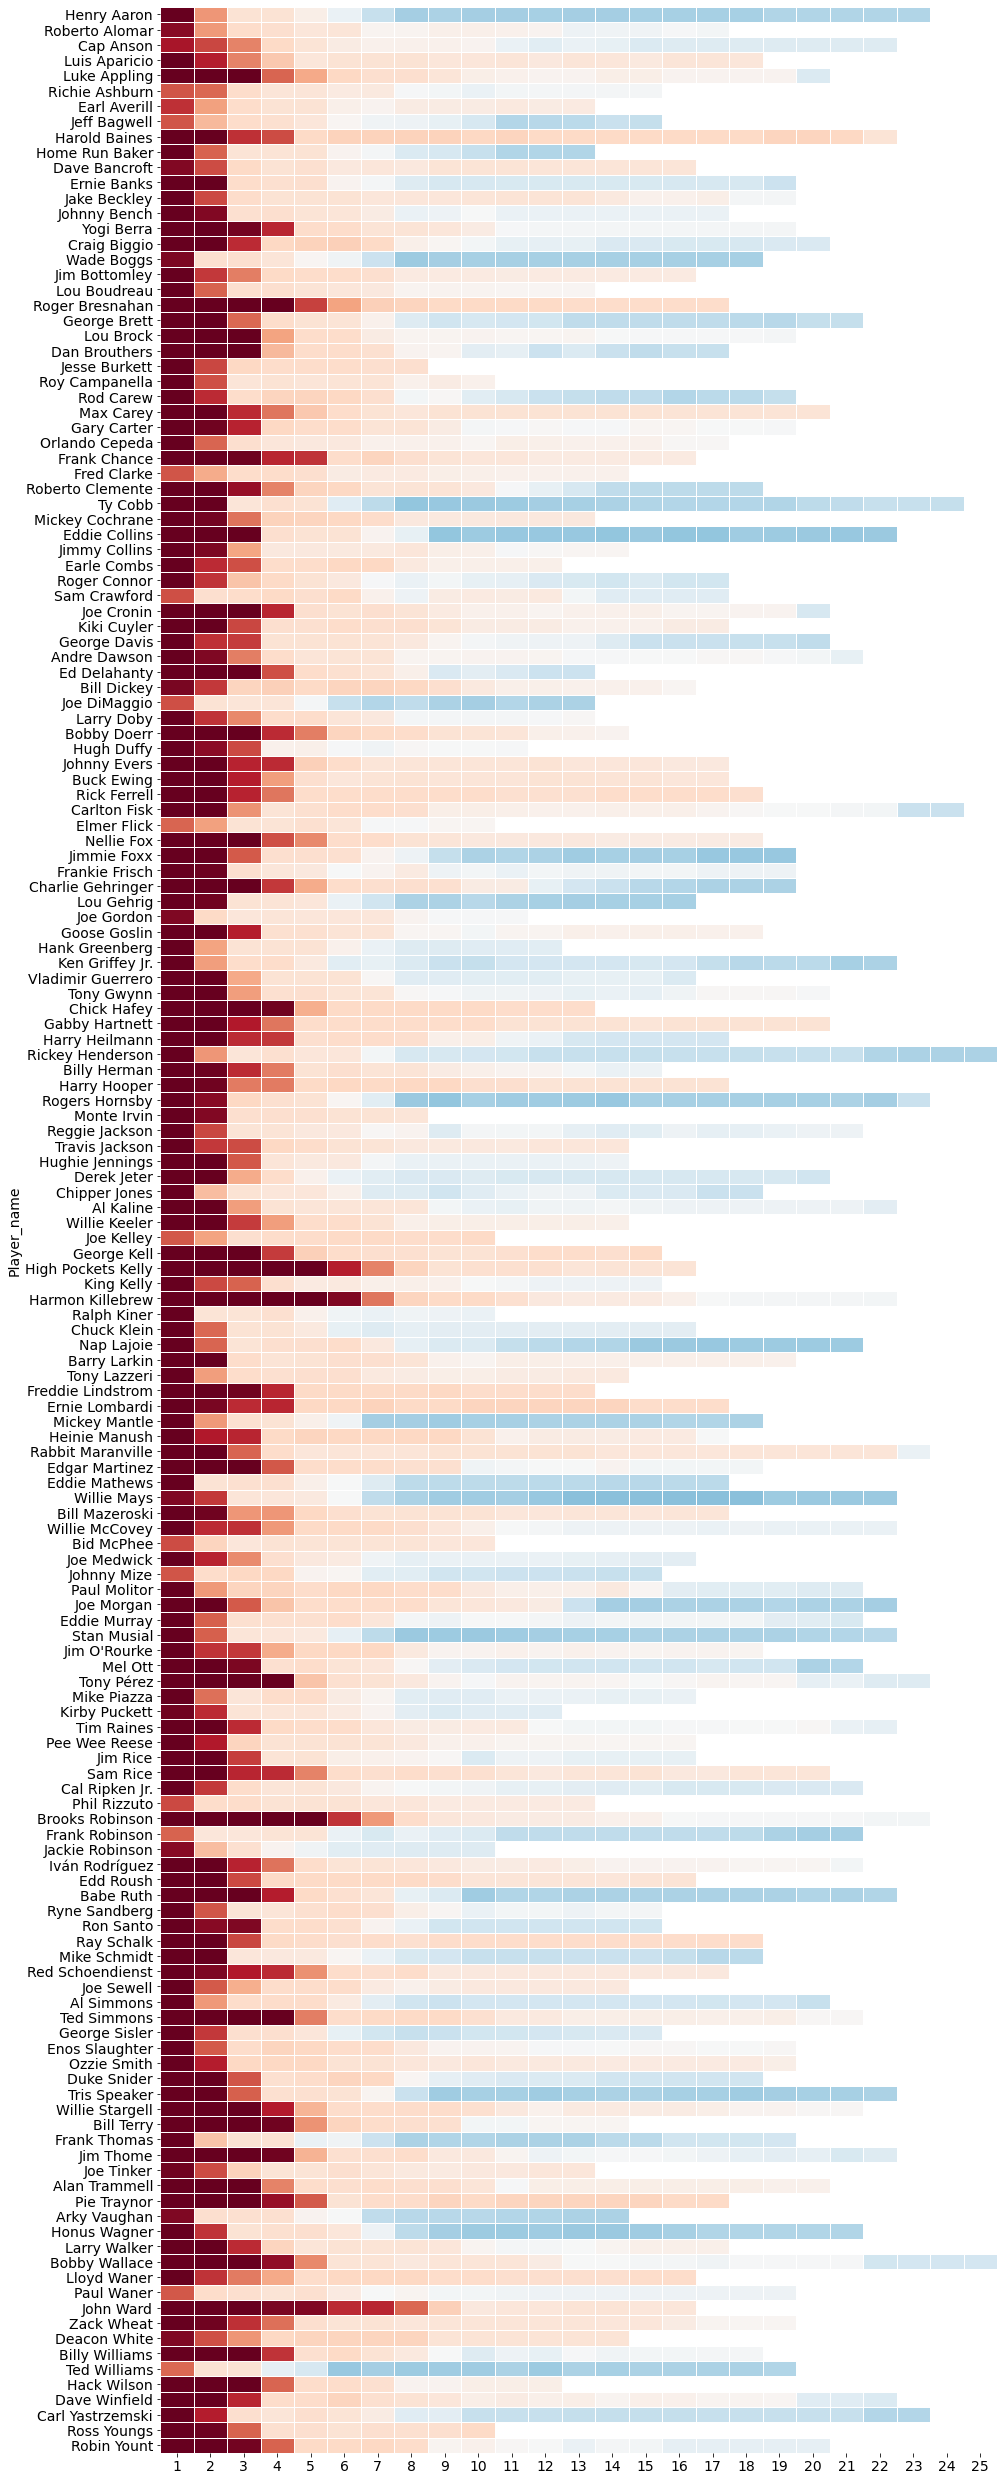

In [ ]:
playerSeasonFullValue = pd.read_csv('asset/playerSeasonFullValueHOF.csv', index_col=0)

plt.figure(figsize = (15,45))
pf = playerSeasonFullValue.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(['Billy Hamilton', 'Sam Thompson', 'Tommy McCarthy'], axis=0, inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

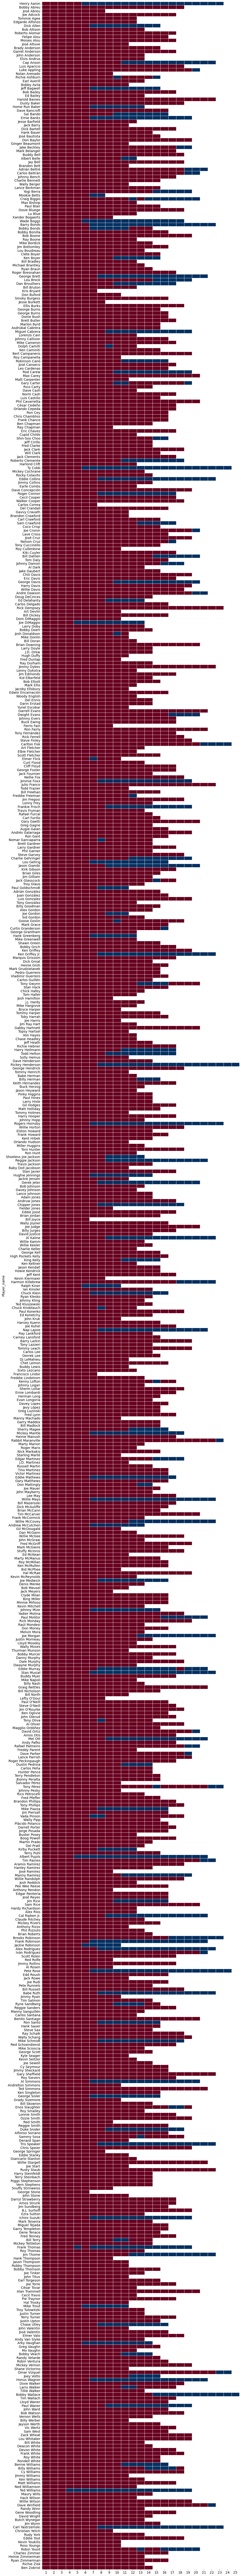

In [ ]:
playerSeasonFullBinary = pd.read_csv('asset/playerSeasonFullBinaryWAR25.csv', index_col=0)

plt.figure(figsize = (15,200))
pf = playerSeasonFullBinary.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

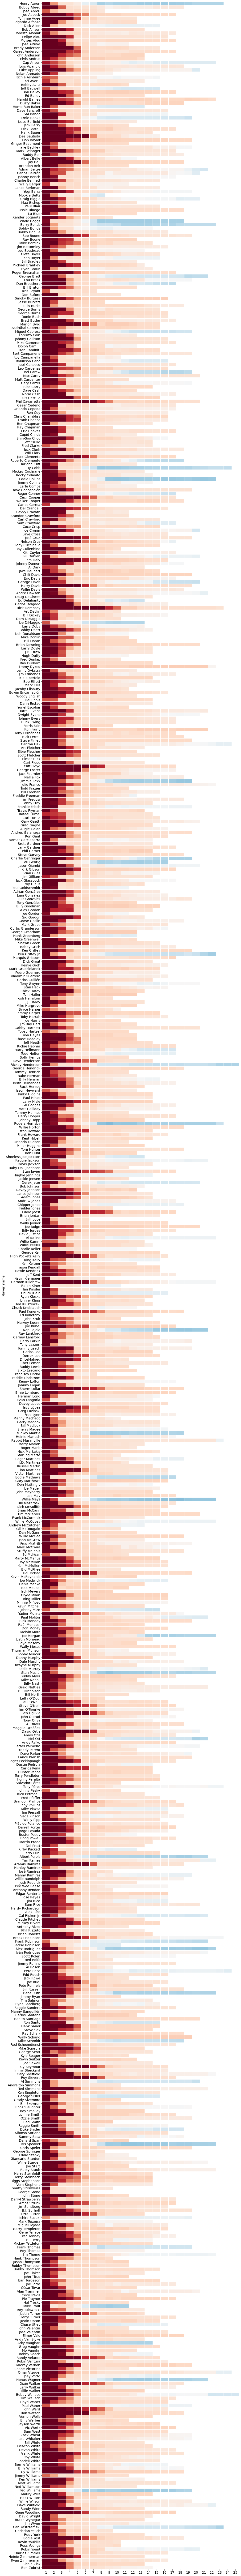

In [ ]:
playerSeasonFullValue = pd.read_csv('asset/playerSeasonFullValueWAR25.csv', index_col=0)

plt.figure(figsize = (15,200))
pf = playerSeasonFullValue.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)